## CS-ELEC-ML SA#1
Josh Kenn Viray - 3CSC


### Preliminary Information

Dataset Attributes 
The dataset consists of 13 input features and one target variable: 
Input Features: 
1.  CRIM: Per capita crime rate by town. 
2.  ZN: Proportion of residential land zoned for lots over 25,000 sq.ft. 
3.  INDUS: Proportion of non-retail business acres per town. 
4.  CHAS: Charles River dummy variable (1 if tract bounds river; 0 otherwise). 
5.  NOX: Nitric oxides concentration (parts per 10 million). 
6.  RM: Average number of rooms per dwelling. 
7.  AGE: Proportion of owner-occupied units built prior to 1940. 
8.  DIS: Weighted distances to five Boston employment centers. 
9.  RAD: Index of accessibility to radial highways. 
10. TAX: Full-value property-tax rate per $10,000. 
11. PTRATIO: Pupil-teacher ratio by town. 
12. B: Calculated as 1000(Bk−0.63)21000(Bk - 0.63)^21000(Bk−0.63)2, where BkBkBk is 
the proportion of Black residents by town. 
13. LSTAT: Percentage of lower-status population. 
Target Variable: 
1.  MEDV: Median value of owner-occupied homes in $1000's

In [1]:
# Import necessary libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.linear_model import ElasticNet
from sklearn.inspection import permutation_importance
import itertools

from ydata_profiling import ProfileReport

In [2]:
# Load the dataset
data = pd.read_csv('./boston.csv')

### 1. Exploratory Data Analysis

- Perform EDA to gain insights into the data distribution and relationships between 
features. 
- Visualize correlations between the input features and the target variable (MEDV). 
- Identify and handle any missing data or outliers.

In [3]:
# Display the top and bottom 5 rows of the dataset
pd.concat([data.head(), data.tail()])

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2
501,0.06263,0.0,11.93,0,0.573,6.593,69.1,2.4786,1,273.0,21.0,391.99,9.67,22.4
502,0.04527,0.0,11.93,0,0.573,6.120,76.7,2.2875,1,273.0,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0,0.573,6.976,91.0,2.1675,1,273.0,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0,0.573,6.794,89.3,2.3889,1,273.0,21.0,393.45,6.48,22.0
505,0.04741,0.0,11.93,0,0.573,6.030,80.8,2.5050,1,273.0,21.0,396.90,7.88,11.9


<Axes: >

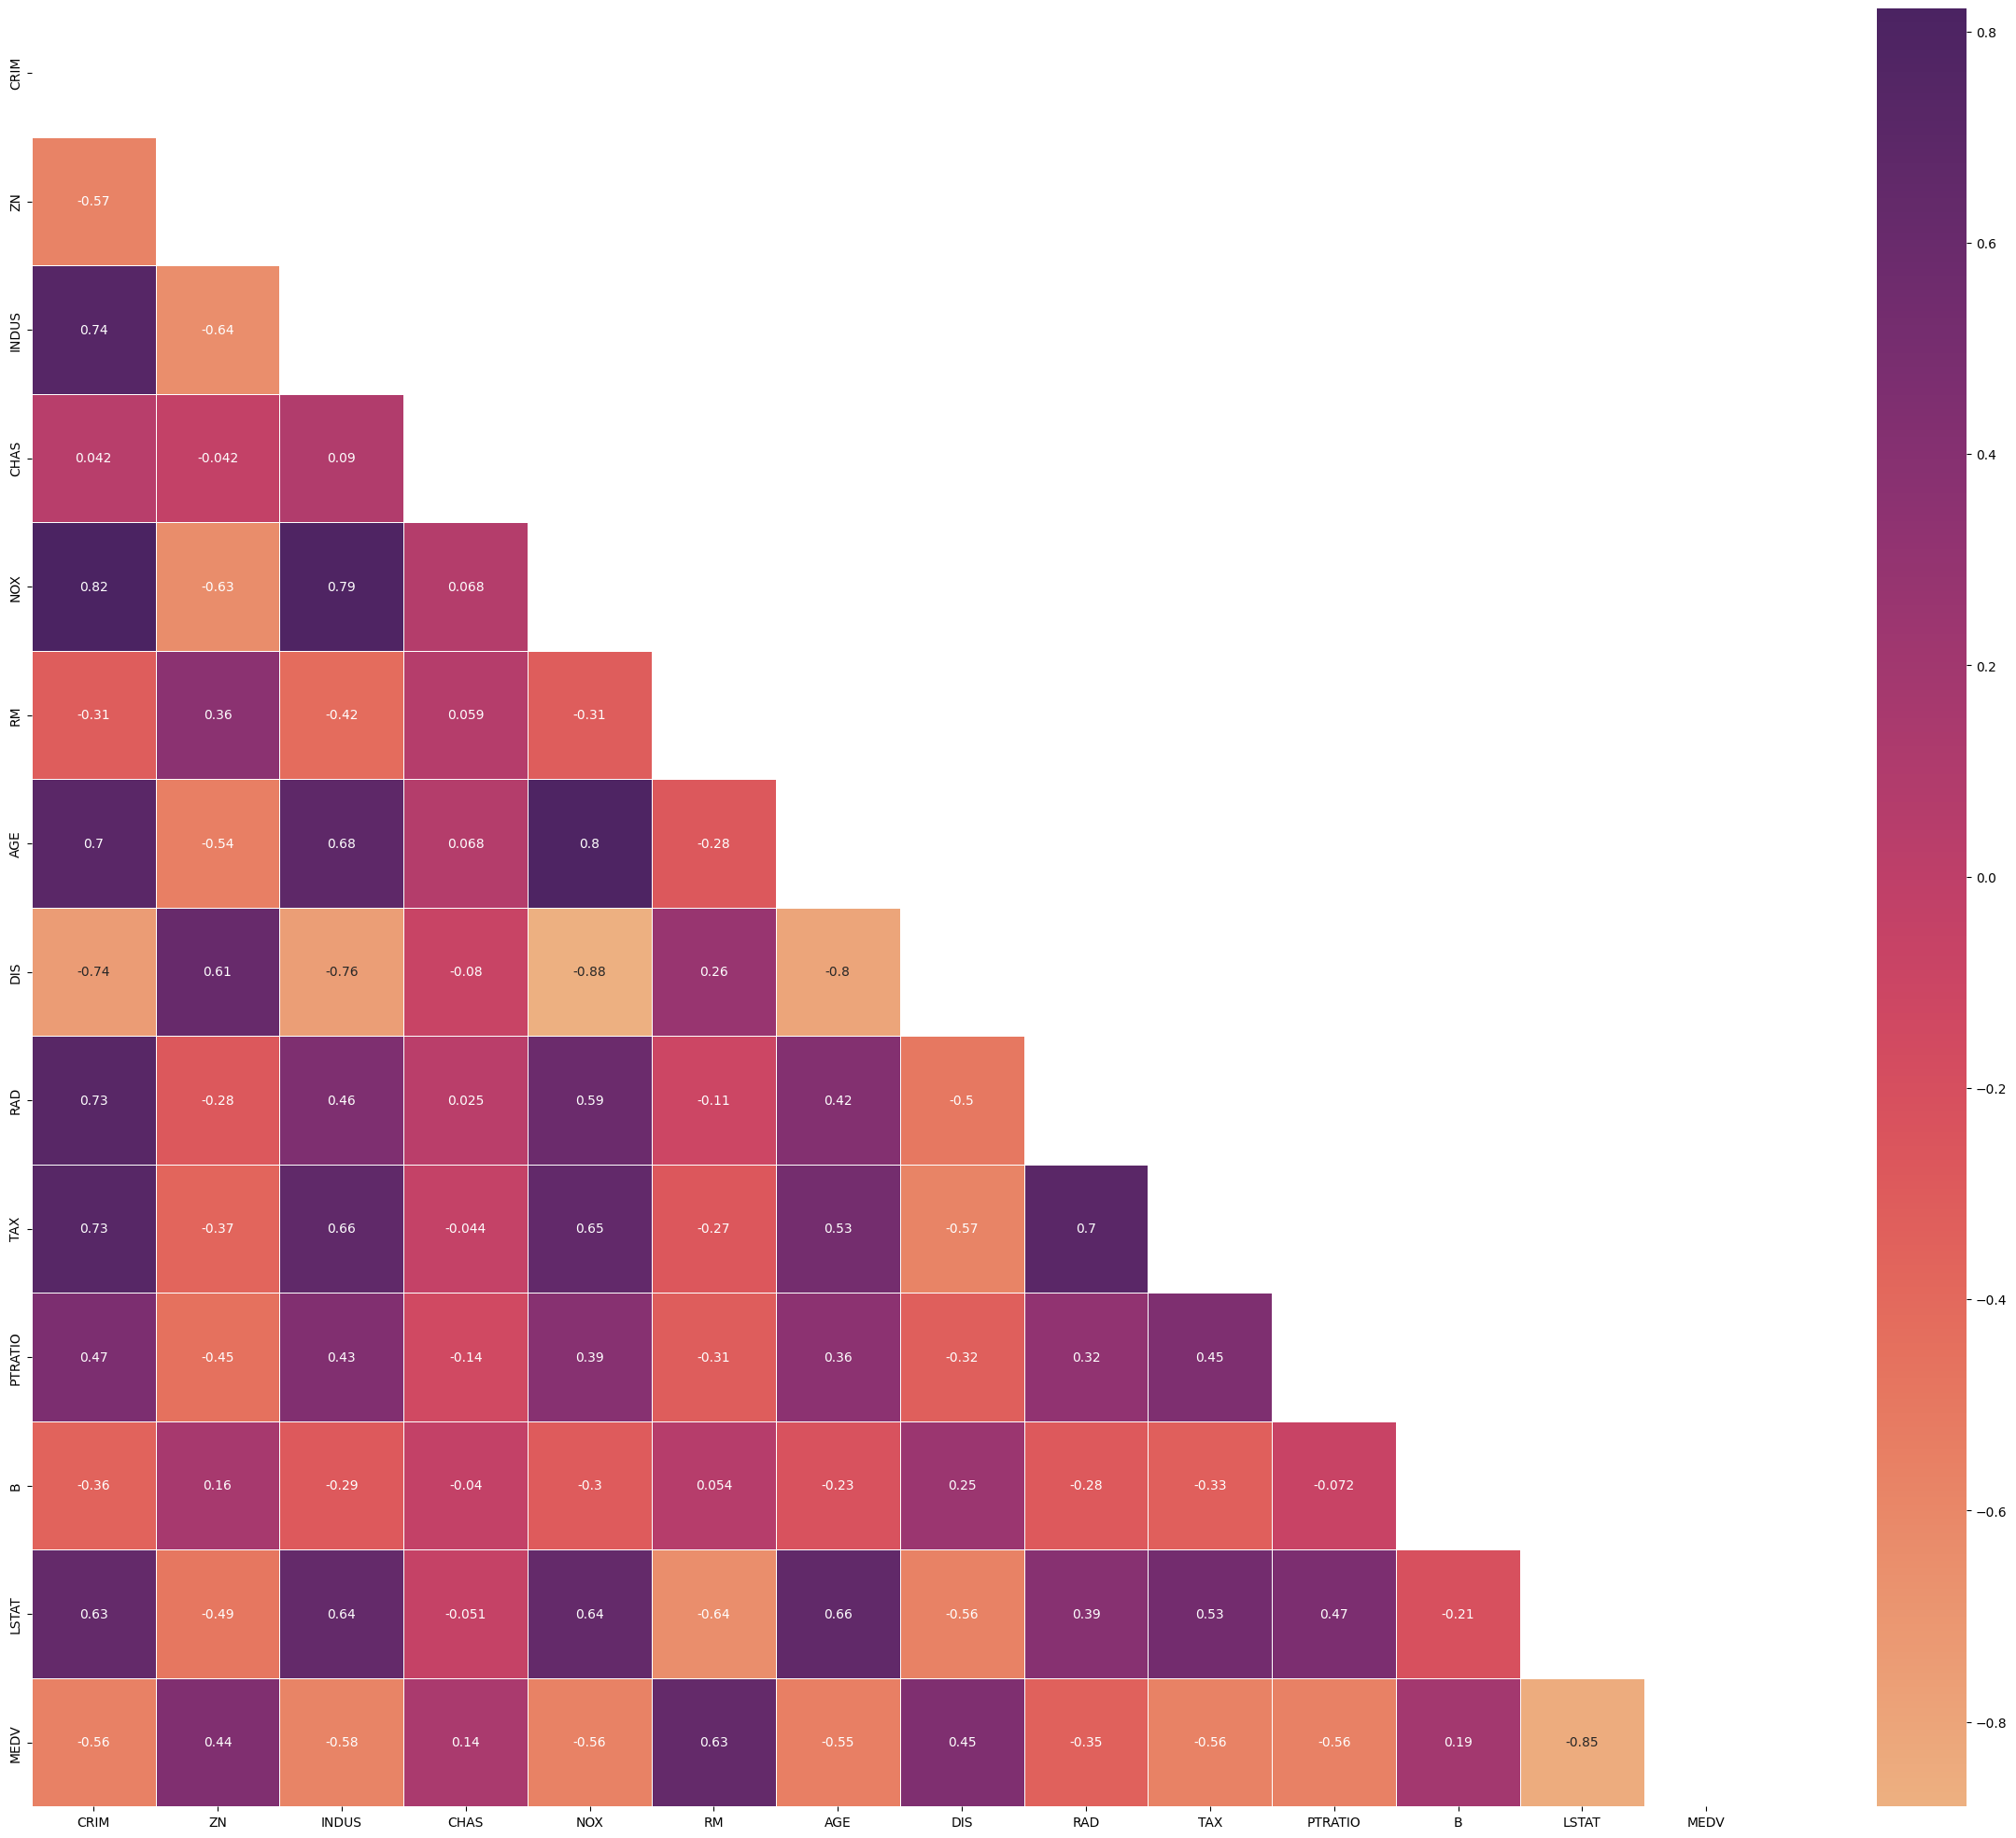

In [4]:
data = data.select_dtypes(include=[np.number])

plt.figure(figsize=(30, 25))
mask = np.zeros_like(data.corr('spearman'))
mask[np.triu_indices_from(mask)] = True
sns.heatmap(data.corr('spearman'), annot=True, cmap='flare', linewidths=.5, mask=mask)

In [5]:
data.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    int64  
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    int64  
 9   TAX      506 non-null    float64
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    506 non-null    float64
 13  MEDV     506 non-null    float64
dtypes: float64(12), int64(2)
memory usage: 55.5 KB


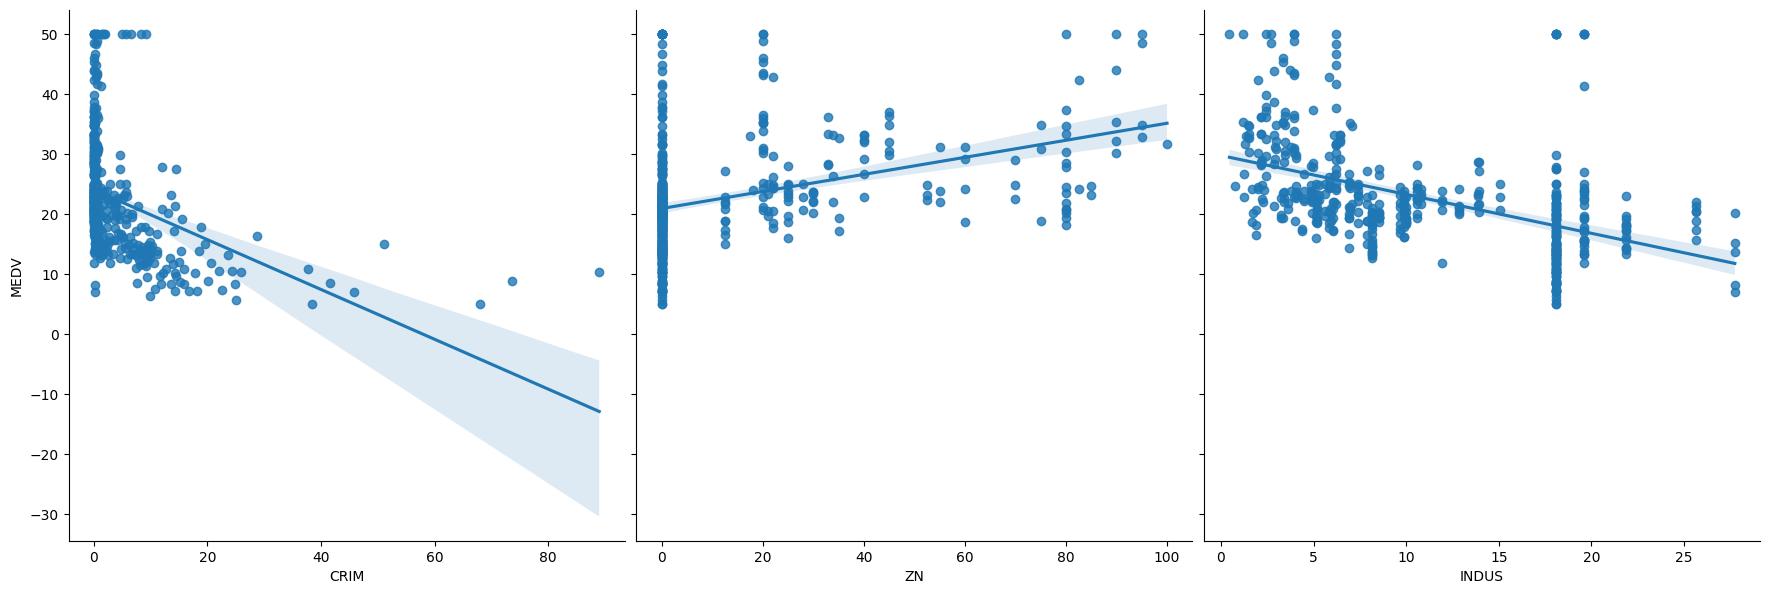

In [7]:
sns.pairplot(data,x_vars=["CRIM","ZN","INDUS"],y_vars =["MEDV"], kind="reg",height=6)

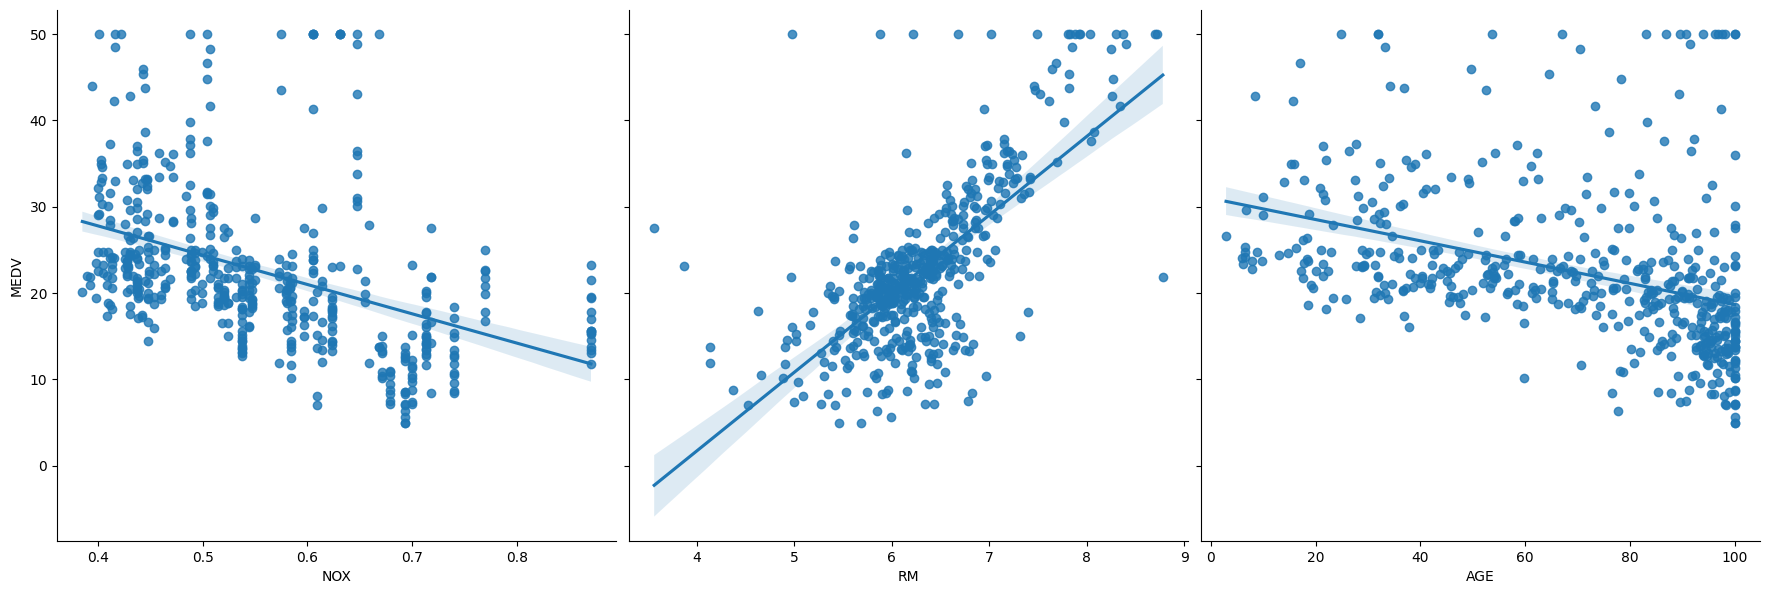

In [8]:
sns.pairplot(data,x_vars=["NOX","RM","AGE"],y_vars =["MEDV"], kind="reg",height=6)

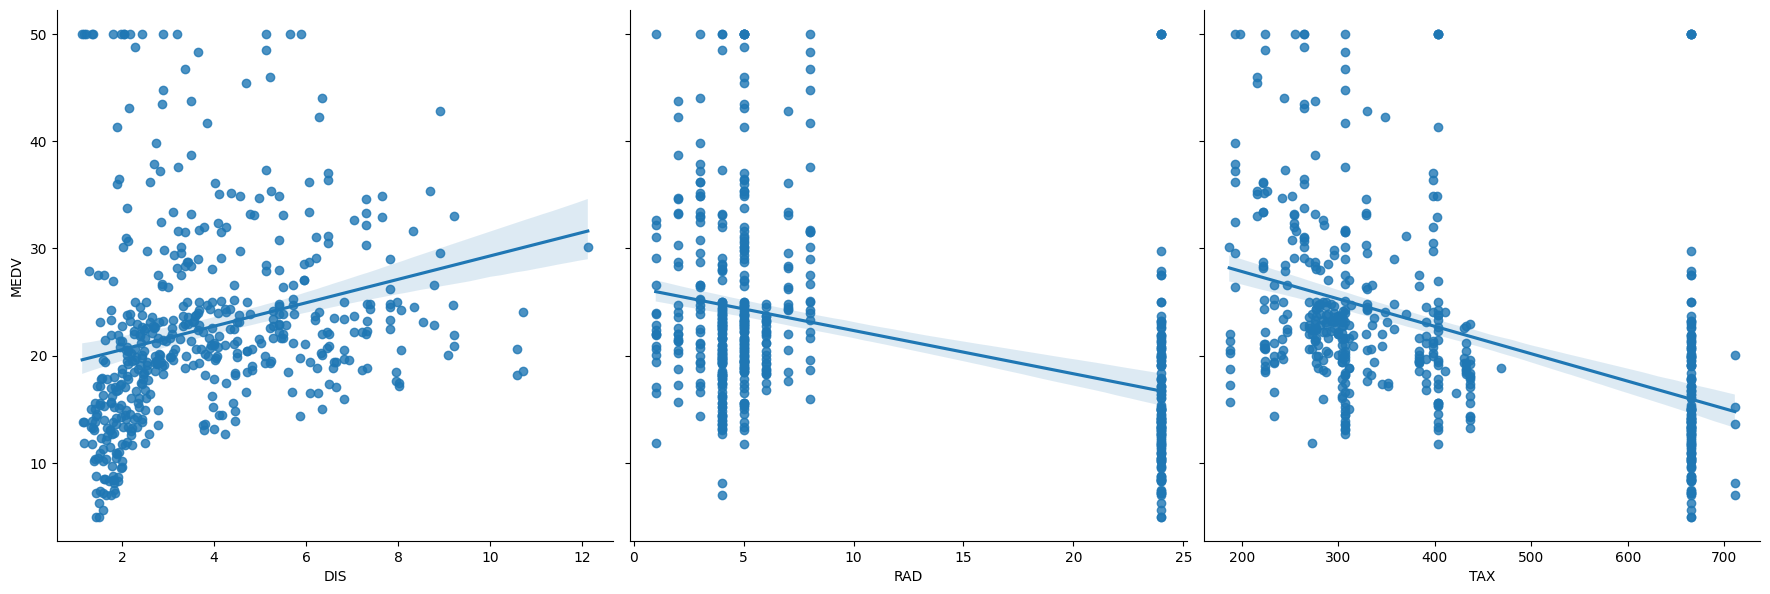

In [9]:
sns.pairplot(data,x_vars=["DIS","RAD","TAX"],y_vars =["MEDV"], kind="reg",height=6)

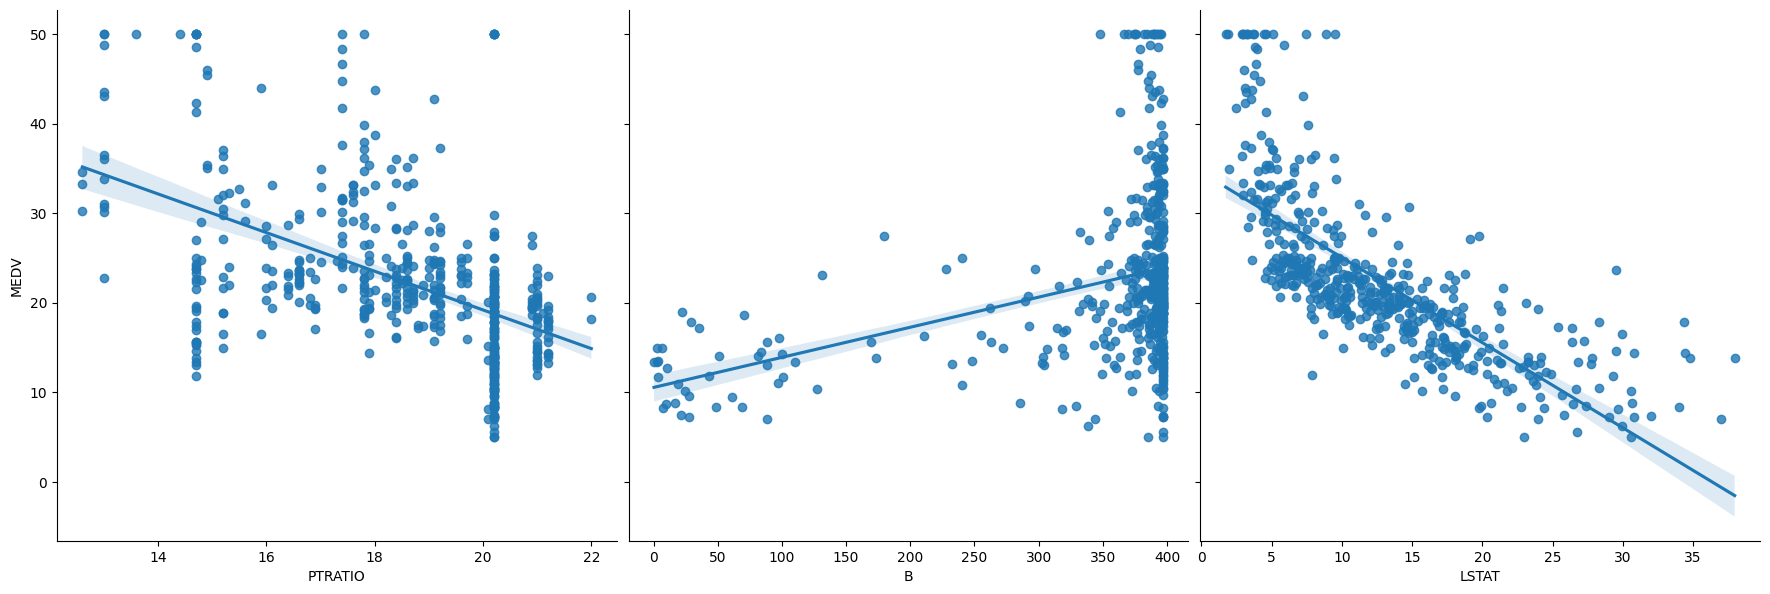

In [10]:
sns.pairplot(data,x_vars=["PTRATIO","B","LSTAT"],y_vars =["MEDV"], kind="reg",height=6)

### Weakly Correlated Features:
1. **CRIM (Per capita crime rate by town):**
   - **Negative correlation** with housing prices: Areas with lower crime rates tend to have higher housing prices, while areas with high crime rates show lower prices.
   - Most areas have a low crime rate, with only a few having higher crime rates.

2. **ZN (Proportion of residential land zoned for lots over 25,000 sq.ft.):**
   - **Positive correlation** with housing prices: Higher proportions of residential land zoning result in higher housing prices.
   - A significant portion of the dataset has low proportions of residential land zoning.

3. **INDUS (Proportion of non-retail business acres per town):**
   - **Negative correlation** with housing prices: As the proportion of non-retail business areas increases, housing prices decrease.

### Moderately to Strongly Correlated Features:
1. **NOX (Nitric oxides concentration):**
   - **Negative correlation** with housing prices: Areas with higher pollution levels (higher NOX concentrations) tend to have lower housing prices. Cleaner air corresponds to higher prices.

2. **RM (Average number of rooms per dwelling):**
   - **Positive correlation** with housing prices: Houses with more rooms generally have higher prices, reflecting the increased size and value. 
   - RM shows a strong correlation with the target variable compared to other features.

3. **AGE (Proportion of owner-occupied units built prior to 1940):**
   - **Negative correlation** with housing prices: Older properties generally have lower prices, and the dataset contains a slightly higher proportion of older houses.

4. **DIS (Weighted distances to five Boston employment centers):**
   - **Positive correlation** with housing prices: Houses closer to employment centers are more expensive, which aligns with common trends in real estate.

5. **RAD (Index of accessibility to radial highways):**
   - **Negative correlation** with housing prices: Houses near highways are less desirable and therefore cheaper. The dataset also shows many areas with low highway accessibility indices and a few with high accessibility.

6. **TAX (Full-value property-tax rate per $10,000):**
   - **Negative correlation** with housing prices: Higher property tax rates are associated with lower housing prices. People prefer areas with lower property taxes.

7. **PTRATIO (Pupil-teacher ratio by town):**
   - **Negative correlation** with housing prices: Areas with better education systems (lower pupil-teacher ratios) tend to have higher housing prices.

8. **B (Proportion of Black residents by town):**
   - **Positive correlation** with housing prices, although this relationship is weak.

9. **LSTAT (Percentage of lower-status population):**
   - **Strong negative correlation** with housing prices: Higher percentages of lower-status populations are associated with lower housing prices. The plot suggests a somewhat curvilinear relationship.

### Key Observations:
- Most features exhibit **linear relationships** with the target variable (MEDV), but not all are strongly correlated.
- We will identify the features that are most significant for prediction during feature selection.
- Given that the target variable (MEDV) is continuous, we will use **regression techniques** to build our predictive model.

## Next Steps:
1. **Implement Multiple Linear Regression:**
   - As a starting point, we will use Multiple Linear Regression to analyze the dataset.

2. **Feature Selection:**
   - We will refine the features to exclude those that do not contribute significantly to the model's performance.

--- 

In [11]:
# Features (X) 
X = data[['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT']]

# Target Variable (y)
y = data['MEDV']

from sklearn.ensemble import RandomForestRegressor
model = RandomForestRegressor()
model.fit(X, y)
importance = model.feature_importances_
for i, v in enumerate(importance):
    print(f"Feature: {X.columns[i]}, Score: {v}")


Feature: CRIM, Score: 0.04238838249414569
Feature: ZN, Score: 0.0012995979620776233
Feature: INDUS, Score: 0.006042537514613319
Feature: CHAS, Score: 0.0009828051930937816
Feature: NOX, Score: 0.021902738519158773
Feature: RM, Score: 0.41736601027006215
Feature: AGE, Score: 0.014761708045996167
Feature: DIS, Score: 0.06992222780277267
Feature: RAD, Score: 0.003769363467735661
Feature: TAX, Score: 0.013302512921372888
Feature: PTRATIO, Score: 0.01594097122768948
Feature: B, Score: 0.011976089816265821
Feature: LSTAT, Score: 0.38034505476501596


### Key Observations
1. **Highly Important Features**:
   - **RM (Average number of rooms per dwelling)** has the highest importance score (0.4299), indicating that it is the most significant predictor of housing prices.
   - **LSTAT (Percentage of lower-status population)** is the second most important feature (0.3776), showing its strong influence on the target variable.

2. **Moderately Important Features**:
   - **DIS (Weighted distances to five Boston employment centers)**: 0.0603
   - **CRIM (Per capita crime rate by town)**: 0.0453
   - **NOX (Nitric oxide concentration)**: 0.0233

3. **Less Important Features**:
   - Features like **ZN**, **CHAS**, and **RAD** have very low importance scores (< 0.01), suggesting they contribute minimally to the model's predictions.

4. **Target Variable Trends**:
   - **RM**: As the number of rooms increases, housing prices typically increase.
   - **LSTAT**: Higher percentages of lower-status populations are associated with lower housing prices.

### Next Steps:
- The model highlights the most critical features for predicting housing prices (`MEDV`), with **RM** and **LSTAT** playing dominant roles.
- Features with very low importance, such as **ZN** and **CHAS**, could potentially be excluded from the model to simplify it without significantly affecting performance later down the line to remove noise.
- However, I will continue to derive the model with all features **first** then reduce the feature set in order to provide a better model.

In [12]:
correlation_matrix = data.corr()
correlation_with_medv = correlation_matrix['MEDV'].sort_values(ascending=False)
print(correlation_with_medv)


MEDV       1.000000
RM         0.695360
ZN         0.360445
B          0.333461
DIS        0.249929
CHAS       0.175260
AGE       -0.376955
RAD       -0.381626
CRIM      -0.388305
NOX       -0.427321
TAX       -0.468536
INDUS     -0.483725
PTRATIO   -0.507787
LSTAT     -0.737663
Name: MEDV, dtype: float64


In [13]:
# # Additionally, we can use ydata to have a profile report of the data
profile = ProfileReport(data, title="Profiling Report")
profile.to_widgets()

### 2. Data Preprocessing

- Normalization/Scaling: Apply appropriate scaling techniques to ensure the 
features are on a similar scale, which is crucial for linear models. 
- Encoding: Handle categorical variables (if any) using suitable encoding 
methods. 
- Feature Selection: Analyze feature importance and potentially reduce 
dimensionality by selecting relevant features.

In [14]:
print(data.isnull().sum())

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
MEDV       0
dtype: int64


In [15]:
# Check that datatypes of the columns
data.dtypes

CRIM       float64
ZN         float64
INDUS      float64
CHAS         int64
NOX        float64
RM         float64
AGE        float64
DIS        float64
RAD          int64
TAX        float64
PTRATIO    float64
B          float64
LSTAT      float64
MEDV       float64
dtype: object

However, since our task is to predict <b>the median value of owner-occupied homes</b> in boston, we need to select a few features as other columns are not necessarily needed.

In [16]:
categorical_features = ['CHAS']
numerical_features = X.columns.difference(categorical_features)

In [17]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X[numerical_features])


data_scaled = pd.DataFrame(X_scaled, columns=numerical_features)
data_scaled[categorical_features] = X[categorical_features].reset_index(drop=True)
print(data_scaled.head())

        AGE         B      CRIM       DIS     INDUS     LSTAT       NOX  \
0 -0.120013  0.441052 -0.419782  0.140214 -1.287909 -1.075562 -0.144217   
1  0.367166  0.441052 -0.417339  0.557160 -0.593381 -0.492439 -0.740262   
2 -0.265812  0.396427 -0.417342  0.557160 -0.593381 -1.208727 -0.740262   
3 -0.809889  0.416163 -0.416750  1.077737 -1.306878 -1.361517 -0.835284   
4 -0.511180  0.441052 -0.412482  1.077737 -1.306878 -1.026501 -0.835284   

    PTRATIO       RAD        RM       TAX        ZN  CHAS  
0 -1.459000 -0.982843  0.413672 -0.666608  0.284830     0  
1 -0.303094 -0.867883  0.194274 -0.987329 -0.487722     0  
2 -0.303094 -0.867883  1.282714 -0.987329 -0.487722     0  
3  0.113032 -0.752922  1.016303 -1.106115 -0.487722     0  
4  0.113032 -0.752922  1.228577 -1.106115 -0.487722     0  


data cleaning
removing outliers within the dataset.


In [18]:
for col in data.select_dtypes(include=['float64', 'int64']).columns:
    lower_limit = data[col].quantile(0.01)
    upper_limit = data[col].quantile(0.99)
    data[col] = data[col].clip(lower=lower_limit, upper=upper_limit)

### 3. Model Implementation

- Baseline Model: Start with a simple linear regression model to establish a 
baseline performance. 
- Advanced Models: Implement Ridge Regression, Lasso Regression, and Elastic 
Net to improve the model by addressing overfitting and underfitting issues. 
- Hyperparameter Tuning: Experiment with different hyperparameters (e.g., 
regularization strength) to optimize model performance.

In [19]:
df = data[['TAX', # is necessary because it provides us with the value of the property tax 
           'INDUS', # proportion of non-retail property/business within the town
           'MEDV', # Median value of owner-occupied homes in $1000's
           'RM', # average number of rooms per dwelling
           'LSTAT', # % lower status of the population
           'DIS', # weighted distances to five Boston employment centres
            'CRIM', # per capita crime rate by town
            'NOX', # nitric oxides concentration (parts per 10 million)
            'PTRATIO', # pupil-teacher ratio by town
            'AGE', # proportion of owner-occupied units built prior to 1940
           ]] 

In [20]:
# Splitting the data into training and testing sets
X = df[ [ 'TAX', 'INDUS', 'RM', 'LSTAT', 'DIS', 'CRIM', 'NOX', 'PTRATIO', 'AGE']] # Remove MEDV as a feature
y = df['MEDV']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [21]:
# Feature scaling
scaler = StandardScaler()

# Features to scale
features_to_scale = [ 'TAX', 'INDUS', 'RM', 'LSTAT', 'DIS', 'CRIM', 'NOX', 'PTRATIO', 'AGE']

X_train_scaled = X_train.copy()
X_test_scaled = X_test.copy()

X_train_scaled[features_to_scale] = scaler.fit_transform(X_train[features_to_scale])
X_test_scaled[features_to_scale] = scaler.transform(X_test[features_to_scale])

Linear Regression Mean Squared Error (MSE): 25.061284712038326
Linear Regression R-squared (R2): 0.6553609567907437


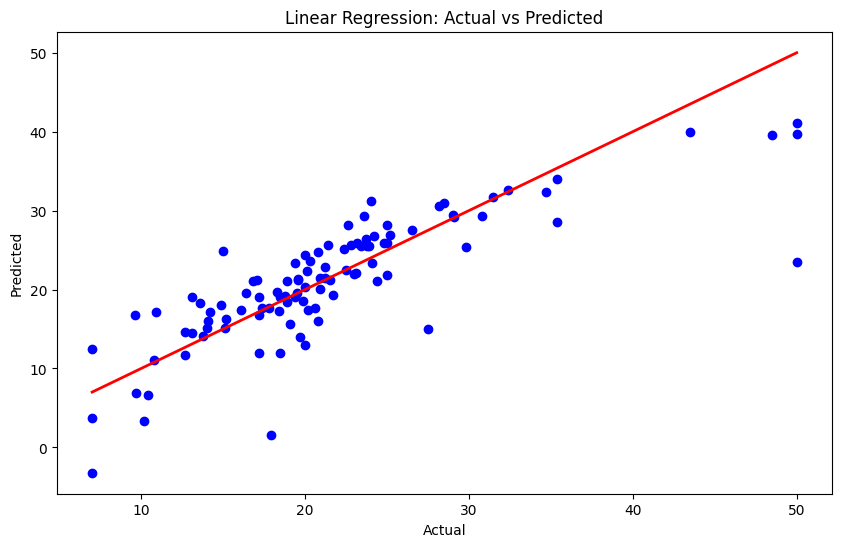

In [22]:
def linear_regression(X_train, y_train, X_test, y_test):
  # Create and train the linear regression model
  linear_model = LinearRegression()
  linear_model.fit(X_train, y_train)

  # Make predictions on the test set
  y_pred_linear = linear_model.predict(X_test)

  # Evaluate the linear regression model
  mse_linear = mean_squared_error(y_test, y_pred_linear)
  r2_linear = r2_score(y_test, y_pred_linear)

  print(f"Linear Regression Mean Squared Error (MSE): {mse_linear}")
  print(f"Linear Regression R-squared (R2): {r2_linear}")

  # Plotting the results
  plt.figure(figsize=(10,6))
  plt.scatter(y_test, y_pred_linear, color='blue')
  plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', lw=2)
  plt.xlabel('Actual')
  plt.ylabel('Predicted')
  plt.title('Linear Regression: Actual vs Predicted')
  plt.show()

  return linear_model, y_pred_linear

linear_model, y_pred_linear = linear_regression(X_train, y_train, X_test, y_test)

Implement Ridge Regression, Lasso Regression, and Elastic Net

Ridge Regression Mean Squared Error (MSE): 25.32585471015135
Ridge Regression R-squared (R2): 0.6517226297033958


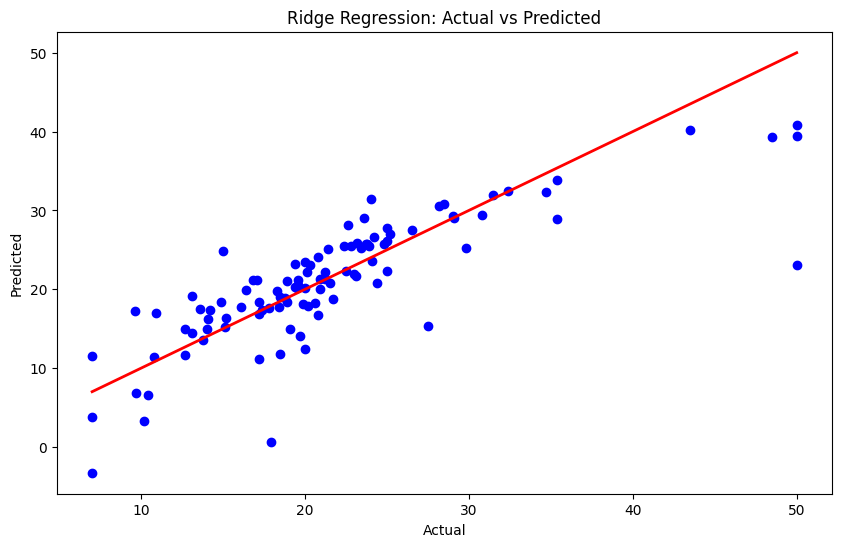

In [23]:
def ridge_regression(X_train, y_train, X_test, y_test, alpha=1.0):
  # Implementing Ridge Regression
  ridge_model = Ridge(alpha=alpha)
  ridge_model.fit(X_train, y_train)

  # Making predictions on the test set
  y_pred_ridge = ridge_model.predict(X_test)

  # Evaluating the Ridge Regression model
  mse_ridge = mean_squared_error(y_test, y_pred_ridge)
  r2_ridge = r2_score(y_test, y_pred_ridge)

  print(f"Ridge Regression Mean Squared Error (MSE): {mse_ridge}")
  print(f"Ridge Regression R-squared (R2): {r2_ridge}")

  plt.figure(figsize=(10,6))
  plt.scatter(y_test, y_pred_ridge, color='blue')
  plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', lw=2)
  plt.xlabel('Actual')
  plt.ylabel('Predicted')
  plt.title('Ridge Regression: Actual vs Predicted')
  plt.show()
  
  return ridge_model, y_pred_ridge

ridge_model, y_pred_ridge = ridge_regression(X_train, y_train, X_test, y_test, alpha=1.0)

Lasso Regression Mean Squared Error (MSE): 25.75806786010242
Lasso Regression R-squared (R2): 0.6457788990378229


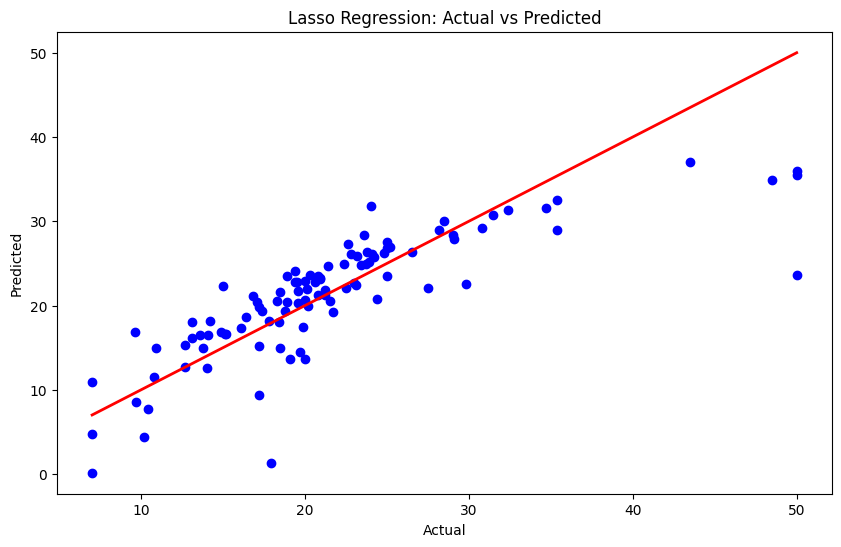

In [24]:
def lasso_regression(X_train, y_train, X_test, y_test, alpha=1.0):
  # Implementing Lasso Regression
  lasso_model = Lasso(alpha=alpha)
  lasso_model.fit(X_train, y_train)

  # Making predictions on the test set
  y_pred_lasso = lasso_model.predict(X_test)

  # Evaluating the Lasso Regression model
  mse_lasso = mean_squared_error(y_test, y_pred_lasso)
  r2_lasso = r2_score(y_test, y_pred_lasso)

  print(f"Lasso Regression Mean Squared Error (MSE): {mse_lasso}")
  print(f"Lasso Regression R-squared (R2): {r2_lasso}")

  # Plotting the results
  plt.figure(figsize=(10,6))
  plt.scatter(y_test, y_pred_lasso, color='blue')
  plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', lw=2)
  plt.xlabel('Actual')
  plt.ylabel('Predicted')
  plt.title('Lasso Regression: Actual vs Predicted')
  plt.show()

  return lasso_model, y_pred_lasso


lasso_model, y_pred_lasso = lasso_regression(X_train, y_train, X_test, y_test, alpha=1.0)

Elastic Net Regression Mean Squared Error (MSE): 26.053693585360655
Elastic Net Regression R-squared (R2): 0.6417134982304933


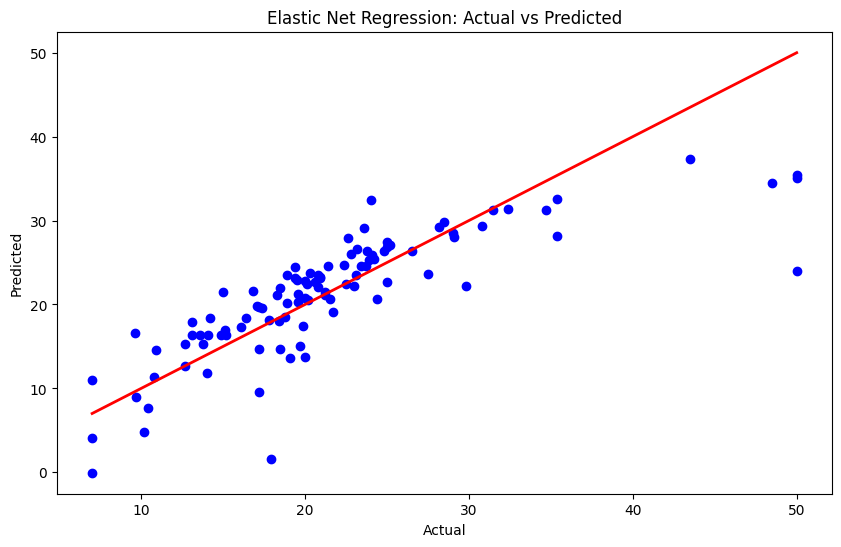

In [25]:
def elastic_net_regression(X_train, y_train, X_test, y_test, alpha=1.0, l1_ratio=0.5):
  # Implementing Elastic Net Regression
  elastic_net_model = ElasticNet(alpha=alpha, l1_ratio=l1_ratio)
  elastic_net_model.fit(X_train, y_train)

  # Making predictions on the test set
  y_pred_elastic_net = elastic_net_model.predict(X_test)

  # Evaluating the Elastic Net Regression model
  mse_elastic_net = mean_squared_error(y_test, y_pred_elastic_net)
  r2_elastic_net = r2_score(y_test, y_pred_elastic_net)

  print(f"Elastic Net Regression Mean Squared Error (MSE): {mse_elastic_net}")
  print(f"Elastic Net Regression R-squared (R2): {r2_elastic_net}")

  # Plotting the results
  plt.figure(figsize=(10,6))
  plt.scatter(y_test, y_pred_elastic_net, color='blue')
  plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', lw=2)
  plt.xlabel('Actual')
  plt.ylabel('Predicted')
  plt.title('Elastic Net Regression: Actual vs Predicted')
  plt.show()

  return elastic_net_model, y_pred_elastic_net

elastic_net_model, y_pred_elastic_net = elastic_net_regression(X_train, y_train, X_test, y_test, alpha=1.0, l1_ratio=0.5)

Hyperparameter tuning

### 4. Model Evaluation

- Evaluate the models using metrics such as Mean Squared Error (MSE), 
R-squared (R²), and Root Mean Squared Error (RMSE). 
- Compare the performance of different models and discuss the trade-offs

In [26]:
# Create DataFrame to store the evaluation metrics
mse_eval = pd.DataFrame({
  "Model": ["Linear", "Ridge", "Lasso", "Elastic Net"],
  "MSE": [
    mean_squared_error(y_test, y_pred_linear),
    mean_squared_error(y_test, y_pred_ridge),
    mean_squared_error(y_test, y_pred_lasso),
    mean_squared_error(y_test, y_pred_elastic_net),
  ],
})

rsquared_eval = pd.DataFrame({
  "Model": ["Linear", "Ridge", "Lasso", "Elastic Net"],
  "R²": [
    r2_score(y_test, y_pred_linear),
    r2_score(y_test, y_pred_ridge),
    r2_score(y_test, y_pred_lasso),
    r2_score(y_test, y_pred_elastic_net),
  ],
})

rmse_eval = pd.DataFrame({
  "Model": ["Linear", "Ridge", "Lasso", "Elastic Net"],
  "RMSE": [
    np.sqrt(mean_squared_error(y_test, y_pred_linear)),
    np.sqrt(mean_squared_error(y_test, y_pred_ridge)),
    np.sqrt(mean_squared_error(y_test, y_pred_lasso)),
    np.sqrt(mean_squared_error(y_test, y_pred_elastic_net)),
  ],
})

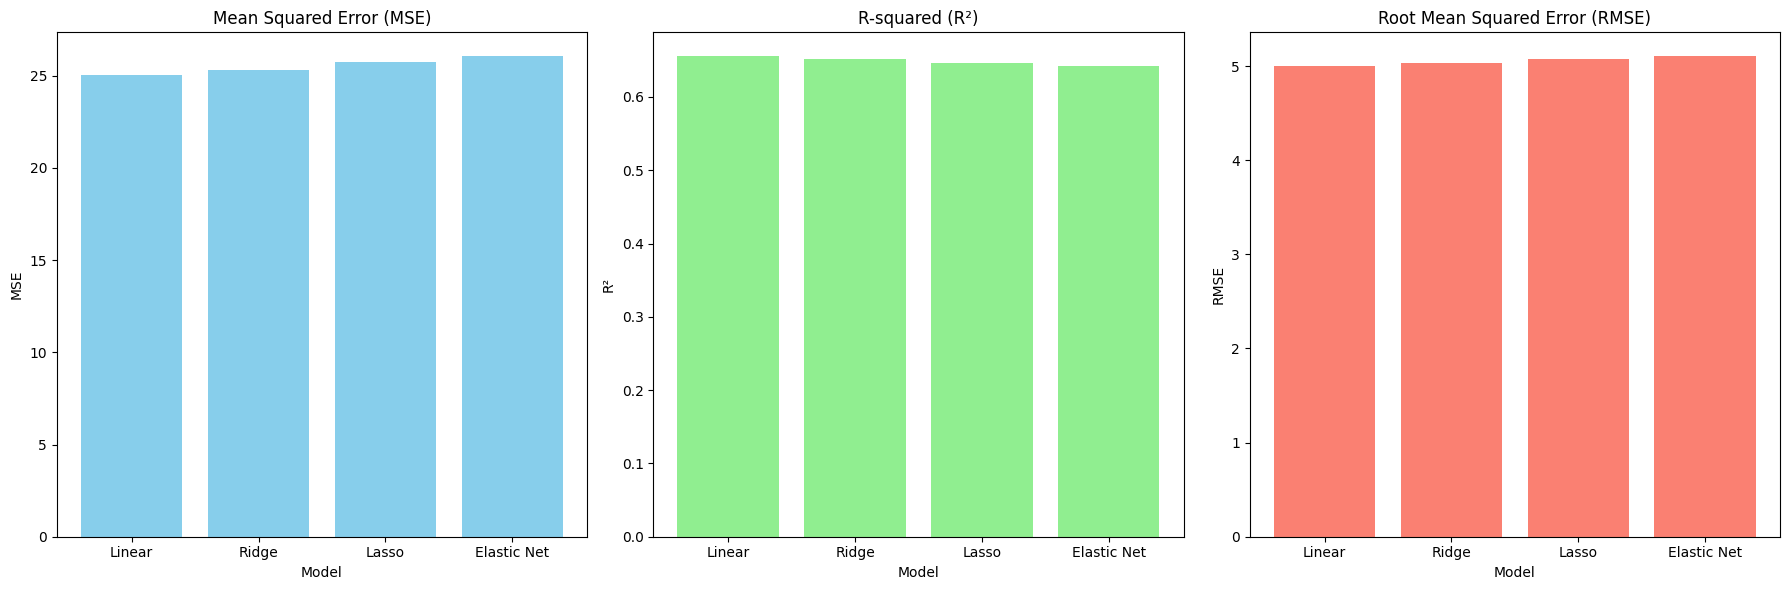

In [27]:
# Plotting the evaluation metrics for comparison
fig, axes = plt.subplots(1, 3, figsize=(18, 6))

# Plotting Mean Squared Error (MSE)
axes[0].bar(mse_eval['Model'], mse_eval['MSE'], color='skyblue')
axes[0].set_title('Mean Squared Error (MSE)')
axes[0].set_xlabel('Model')
axes[0].set_ylabel('MSE')

# Plotting R-squared (R²)
axes[1].bar(rsquared_eval['Model'], rsquared_eval['R²'], color='lightgreen')
axes[1].set_title('R-squared (R²)')
axes[1].set_xlabel('Model')
axes[1].set_ylabel('R²')

# Plotting Root Mean Squared Error (RMSE)
axes[2].bar(rmse_eval['Model'], rmse_eval['RMSE'], color='salmon')
axes[2].set_title('Root Mean Squared Error (RMSE)')
axes[2].set_xlabel('Model')
axes[2].set_ylabel('RMSE')

plt.tight_layout()
plt.show()

In [28]:
def evaluate_model_linear(X_train, y_train, X_test, y_test):
    model = LinearRegression()
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    mse = mean_squared_error(y_test, y_pred)
    rmse = np.sqrt(mse)  # Compute RMSE
    r2 = r2_score(y_test, y_pred)
    return mse, rmse, r2  # Returns all three metrics

def graph_linear_performance(X_train, y_train, X_test, y_test):
    mse, rmse, r2 = evaluate_model_linear(X_train, y_train, X_test, y_test)
    
    metrics = {"MSE": mse, "RMSE": rmse, "R²": r2}
    metric_names = list(metrics.keys())
    values = list(metrics.values())
    
    fig, ax = plt.subplots(figsize=(8, 6))
    bars = ax.bar(metric_names, values, color=['blue', 'green', 'red'])
    
    # Annotate extreme points
    for bar in bars:
        yval = bar.get_height()
        ax.text(bar.get_x() + bar.get_width()/2, yval, f'{yval:.4f}', ha='center', va='bottom')
    
    ax.set_ylabel("Metric Values")
    ax.set_title("Performance Metrics for Linear Regression")
    ax.grid(axis='y')
    plt.show()


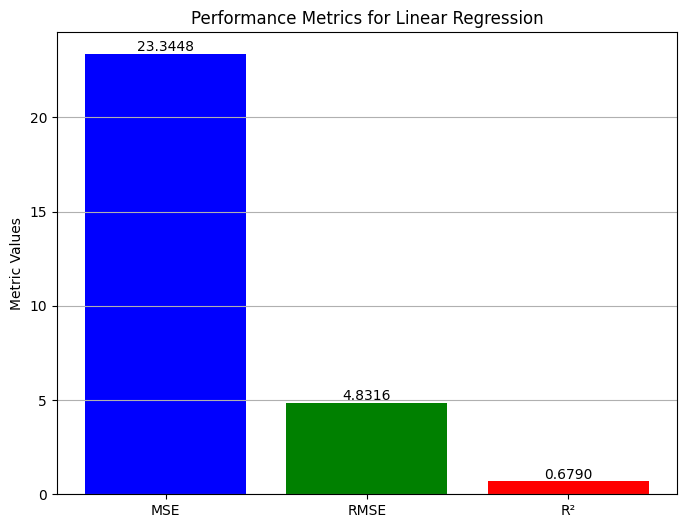

In [29]:
graph_linear_performance(X_train, y_train, X_test, y_test)

In [30]:
evaluate_model_linear(X_train, y_train, X_test, y_test)
  

(25.061284712038326, 5.006124719984344, 0.6553609567907437)

In [31]:
def evaluate_model_ridge(X_train, y_train, X_test, y_test, alpha):
    model = Ridge(alpha=alpha)
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    mse = mean_squared_error(y_test, y_pred)
    rmse = np.sqrt(mse)  # Compute RMSE
    r2 = r2_score(y_test, y_pred)
    return mse, rmse, r2  # Returns all three metrics

def graph_ridge_performance(X_train, y_train, X_test, y_test, target):
    alphas = np.arange(0.1, target, 0.1)  # Generate values from 0.1 to 1000 in 0.1 increments
    mse_values = []
    rmse_values = []
    r2_values = []

    for alpha in alphas:
        mse, rmse, r2 = evaluate_model_ridge(X_train, y_train, X_test, y_test, alpha)
        mse_values.append(mse)
        rmse_values.append(rmse)
        r2_values.append(r2)

    # Identify extreme points
    min_mse, max_mse = min(mse_values), max(mse_values)
    min_rmse, max_rmse = min(rmse_values), max(rmse_values)
    min_r2, max_r2 = min(r2_values), max(r2_values)
    min_mse_alpha, max_mse_alpha = alphas[mse_values.index(min_mse)], alphas[mse_values.index(max_mse)]
    min_rmse_alpha, max_rmse_alpha = alphas[rmse_values.index(min_rmse)], alphas[rmse_values.index(max_rmse)]
    min_r2_alpha, max_r2_alpha = alphas[r2_values.index(min_r2)], alphas[r2_values.index(max_r2)]

    # Create subplots: 1 row, 3 columns
    fig, axes = plt.subplots(1, 3, figsize=(18, 6))
    
    # Plot MSE
    axes[0].plot(alphas, mse_values, label="MSE", color='blue')
    axes[0].set_xlabel("Alpha (Regularization Strength)")
    axes[0].set_ylabel("Mean Squared Error (MSE)")
    axes[0].set_title("MSE vs Alpha in Ridge Regression")
    axes[0].legend()
    axes[0].grid()
    axes[0].scatter([min_mse_alpha, max_mse_alpha], [min_mse, max_mse], color='red')
    axes[0].annotate(f"Min: {min_mse:.4f}", (min_mse_alpha, min_mse), textcoords="offset points", xytext=(0,10), ha='center')
    axes[0].annotate(f"Max: {max_mse:.4f}", (max_mse_alpha, max_mse), textcoords="offset points", xytext=(0,-15), ha='center')

    # Plot RMSE
    axes[1].plot(alphas, rmse_values, label="RMSE", color='green')
    axes[1].set_xlabel("Alpha (Regularization Strength)")
    axes[1].set_ylabel("Root Mean Squared Error (RMSE)")
    axes[1].set_title("RMSE vs Alpha in Ridge Regression")
    axes[1].legend()
    axes[1].grid()
    axes[1].scatter([min_rmse_alpha, max_rmse_alpha], [min_rmse, max_rmse], color='red')
    axes[1].annotate(f"Min: {min_rmse:.4f}", (min_rmse_alpha, min_rmse), textcoords="offset points", xytext=(0,10), ha='center')
    axes[1].annotate(f"Max: {max_rmse:.4f}", (max_rmse_alpha, max_rmse), textcoords="offset points", xytext=(0,-15), ha='center')

    # Plot R² Score
    axes[2].plot(alphas, r2_values, label="R² Score", color='red')
    axes[2].set_xlabel("Alpha (Regularization Strength)")
    axes[2].set_ylabel("R² Score")
    axes[2].set_title("R² Score vs Alpha in Ridge Regression")
    axes[2].legend()
    axes[2].grid()
    axes[2].scatter([min_r2_alpha, max_r2_alpha], [min_r2, max_r2], color='red')
    axes[2].annotate(f"Min: {min_r2:.4f}", (min_r2_alpha, min_r2), textcoords="offset points", xytext=(0,10), ha='center')
    axes[2].annotate(f"Max: {max_r2:.4f}", (max_r2_alpha, max_r2), textcoords="offset points", xytext=(0,-15), ha='center')

    # Adjust layout and show plots
    plt.tight_layout()
    plt.show()


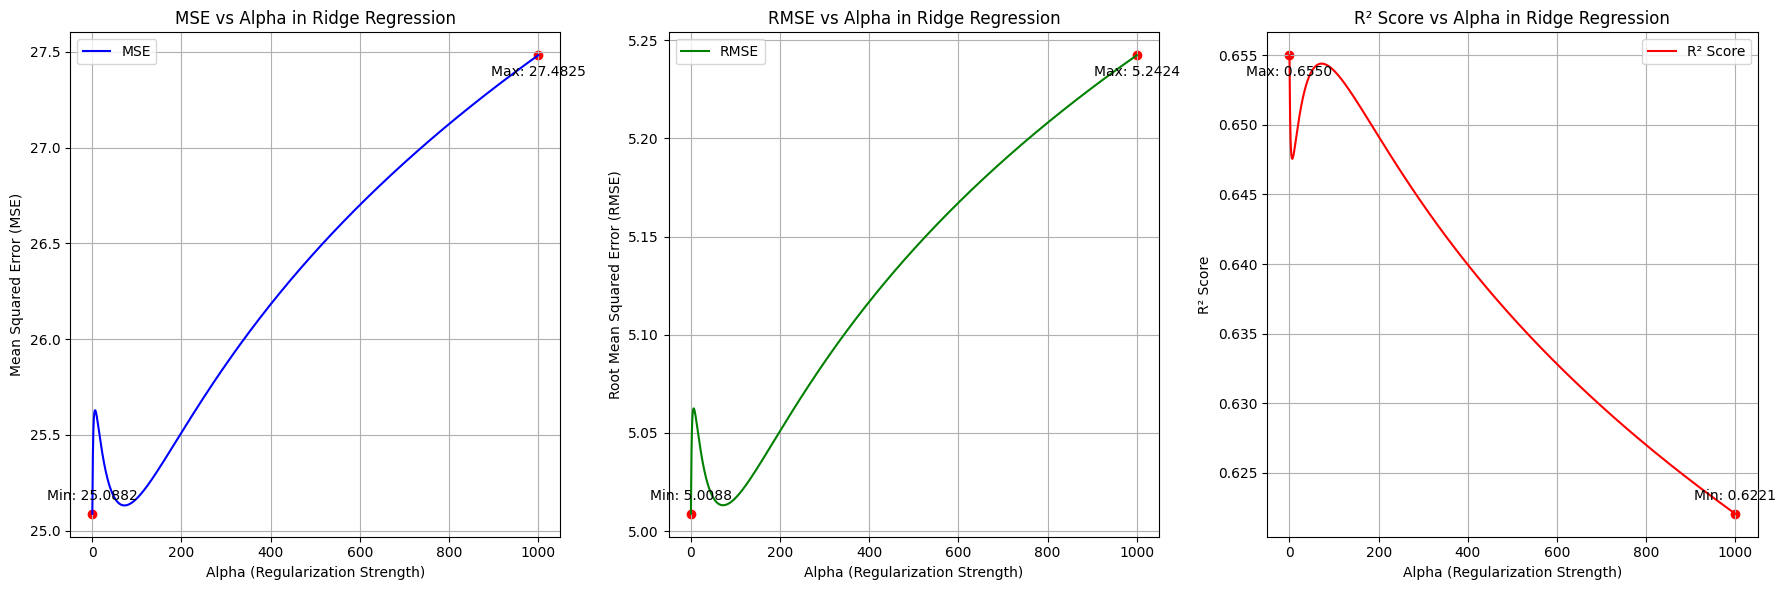

In [32]:
graph_ridge_performance(X_train, y_train, X_test, y_test, 1000.1)

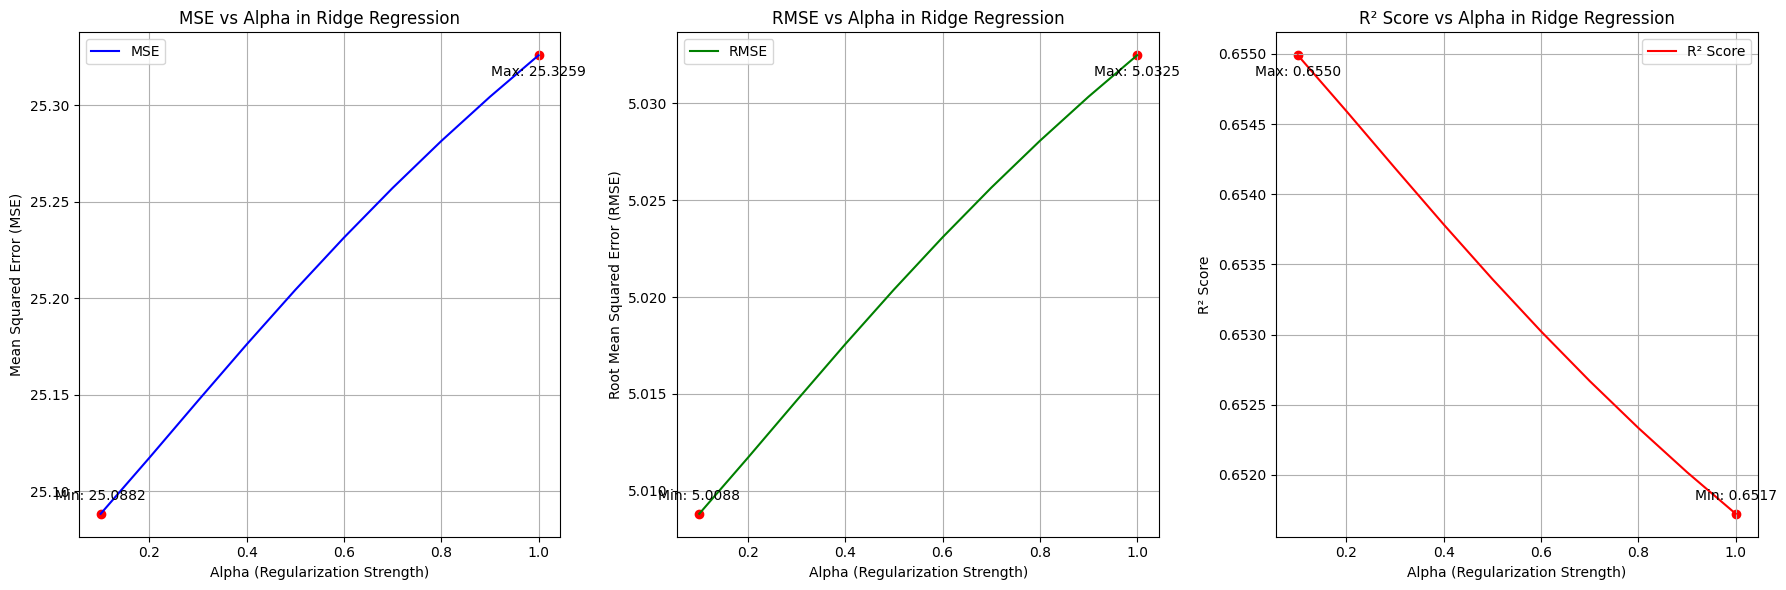

In [33]:
graph_ridge_performance(X_train, y_train, X_test, y_test, 1.1)

In [34]:
def evaluate_model_lasso(X_train, y_train, X_test, y_test, alpha):
    """Trains Lasso regression and returns MSE, RMSE, and R² score."""
    model = Lasso(alpha=alpha)
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    mse = mean_squared_error(y_test, y_pred)
    rmse = np.sqrt(mse)  # Compute RMSE
    r2 = r2_score(y_test, y_pred)
    return mse, rmse, r2  # Returns all three metrics

def graph_lasso_performance(X_train, y_train, X_test, y_test, target):
    alphas = np.arange(0.1, target, 0.1)  # Generate values from 0.1 to 1000 in 0.1 increments
    mse_values = []
    rmse_values = []
    r2_values = []

    for alpha in alphas:
        mse, rmse, r2 = evaluate_model_lasso(X_train, y_train, X_test, y_test, alpha)
        mse_values.append(mse)
        rmse_values.append(rmse)
        r2_values.append(r2)

    # Identify extreme points
    min_mse, max_mse = min(mse_values), max(mse_values)
    min_rmse, max_rmse = min(rmse_values), max(rmse_values)
    min_r2, max_r2 = min(r2_values), max(r2_values)
    min_mse_alpha, max_mse_alpha = alphas[mse_values.index(min_mse)], alphas[mse_values.index(max_mse)]
    min_rmse_alpha, max_rmse_alpha = alphas[rmse_values.index(min_rmse)], alphas[rmse_values.index(max_rmse)]
    min_r2_alpha, max_r2_alpha = alphas[r2_values.index(min_r2)], alphas[r2_values.index(max_r2)]

    # Create subplots: 1 row, 3 columns
    fig, axes = plt.subplots(1, 3, figsize=(18, 6))
    
    # Plot MSE
    axes[0].plot(alphas, mse_values, label="MSE", color='blue')
    axes[0].set_xlabel("Alpha (Regularization Strength)")
    axes[0].set_ylabel("Mean Squared Error (MSE)")
    axes[0].set_title("MSE vs Alpha in Lasso Regression")
    axes[0].legend()
    axes[0].grid()
    axes[0].scatter([min_mse_alpha, max_mse_alpha], [min_mse, max_mse], color='red')
    axes[0].annotate(f"Min: {min_mse:.4f}", (min_mse_alpha, min_mse), textcoords="offset points", xytext=(0,10), ha='center')
    axes[0].annotate(f"Max: {max_mse:.4f}", (max_mse_alpha, max_mse), textcoords="offset points", xytext=(0,-15), ha='center')

    # Plot RMSE
    axes[1].plot(alphas, rmse_values, label="RMSE", color='green')
    axes[1].set_xlabel("Alpha (Regularization Strength)")
    axes[1].set_ylabel("Root Mean Squared Error (RMSE)")
    axes[1].set_title("RMSE vs Alpha in Lasso Regression")
    axes[1].legend()
    axes[1].grid()
    axes[1].scatter([min_rmse_alpha, max_rmse_alpha], [min_rmse, max_rmse], color='red')
    axes[1].annotate(f"Min: {min_rmse:.4f}", (min_rmse_alpha, min_rmse), textcoords="offset points", xytext=(0,10), ha='center')
    axes[1].annotate(f"Max: {max_rmse:.4f}", (max_rmse_alpha, max_rmse), textcoords="offset points", xytext=(0,-15), ha='center')

    # Plot R² Score
    axes[2].plot(alphas, r2_values, label="R² Score", color='red')
    axes[2].set_xlabel("Alpha (Regularization Strength)")
    axes[2].set_ylabel("R² Score")
    axes[2].set_title("R² Score vs Alpha in Lasso Regression")
    axes[2].legend()
    axes[2].grid()
    axes[2].scatter([min_r2_alpha, max_r2_alpha], [min_r2, max_r2], color='red')
    axes[2].annotate(f"Min: {min_r2:.4f}", (min_r2_alpha, min_r2), textcoords="offset points", xytext=(0,10), ha='center')
    axes[2].annotate(f"Max: {max_r2:.4f}", (max_r2_alpha, max_r2), textcoords="offset points", xytext=(0,-15), ha='center')

    # Adjust layout and show plots
    plt.tight_layout()
    plt.show()


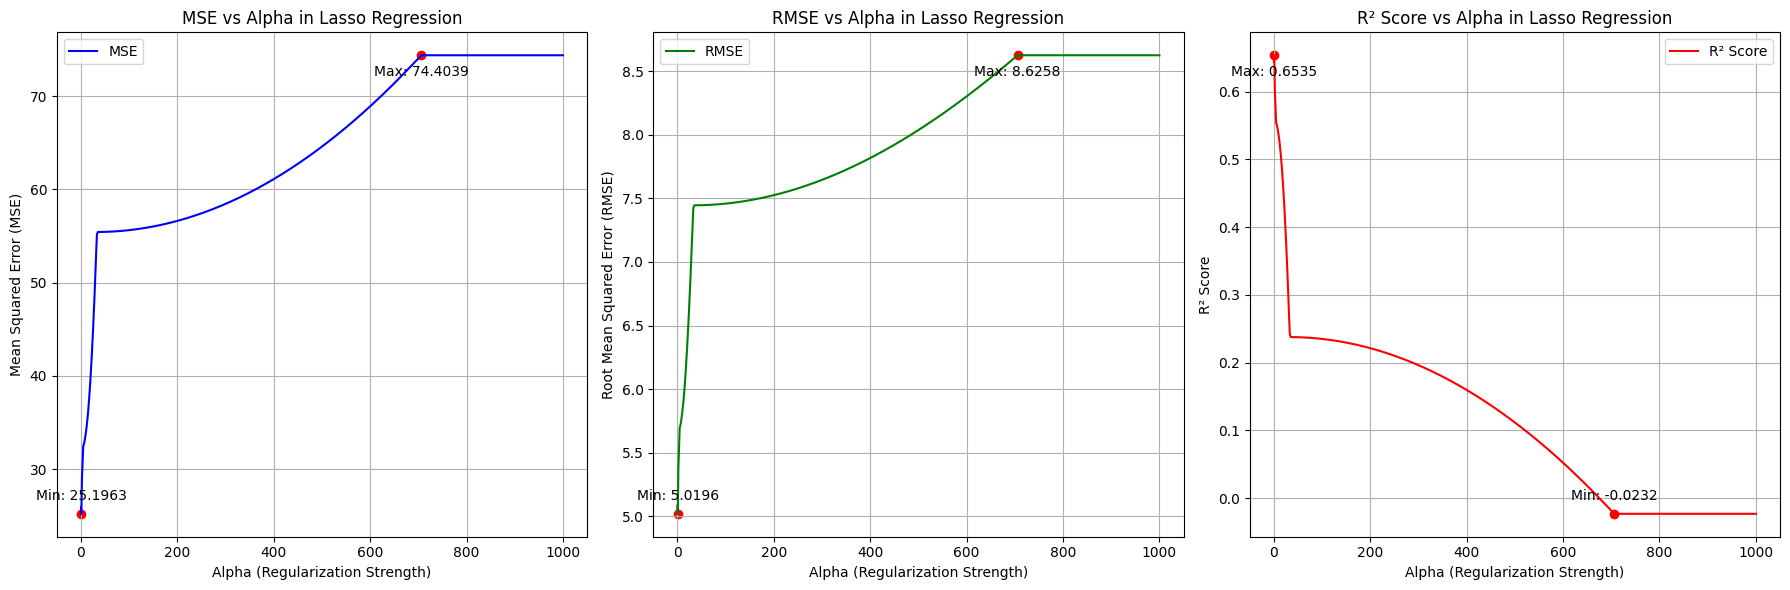

In [35]:
graph_lasso_performance(X_train, y_train, X_test, y_test, 1000.1)

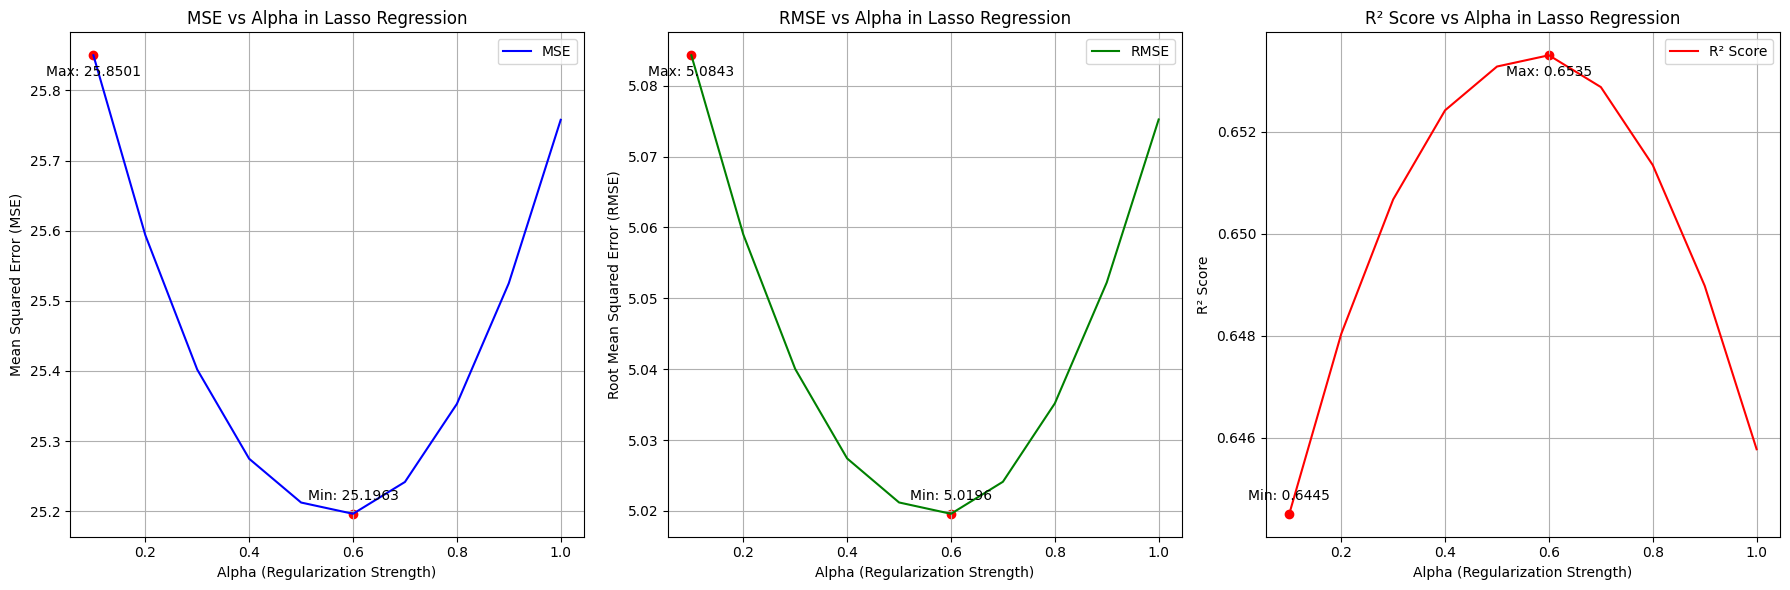

In [36]:
graph_lasso_performance(X_train, y_train, X_test, y_test, 1.1)

In [37]:
def evaluate_model_elasticnet(X_train, y_train, X_test, y_test, alpha, l1_ratio=0.5):
    model = ElasticNet(alpha=alpha, l1_ratio=l1_ratio)
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    mse = mean_squared_error(y_test, y_pred)
    rmse = np.sqrt(mse)  # Compute RMSE
    r2 = r2_score(y_test, y_pred)
    return mse, rmse, r2  # Returns all three metrics

def graph_elasticnet_performance(X_train, y_train, X_test, y_test, target, l1_ratio=0.5):
    alphas = np.arange(0.1, target, 0.1)  # Generate values from 0.1 to 1000 in 0.1 increments
    mse_values = []
    rmse_values = []
    r2_values = []

    for alpha in alphas:
        mse, rmse, r2 = evaluate_model_elasticnet(X_train, y_train, X_test, y_test, alpha, l1_ratio)
        mse_values.append(mse)
        rmse_values.append(rmse)
        r2_values.append(r2)

    # Identify extreme points
    min_mse, max_mse = min(mse_values), max(mse_values)
    min_rmse, max_rmse = min(rmse_values), max(rmse_values)
    min_r2, max_r2 = min(r2_values), max(r2_values)
    min_mse_alpha, max_mse_alpha = alphas[mse_values.index(min_mse)], alphas[mse_values.index(max_mse)]
    min_rmse_alpha, max_rmse_alpha = alphas[rmse_values.index(min_rmse)], alphas[rmse_values.index(max_rmse)]
    min_r2_alpha, max_r2_alpha = alphas[r2_values.index(min_r2)], alphas[r2_values.index(max_r2)]

    # Create subplots: 1 row, 3 columns
    fig, axes = plt.subplots(1, 3, figsize=(18, 6))
    
    # Plot MSE
    axes[0].plot(alphas, mse_values, label="MSE", color='blue')
    axes[0].set_xlabel("Alpha (Regularization Strength)")
    axes[0].set_ylabel("Mean Squared Error (MSE)")
    axes[0].set_title("MSE vs Alpha in ElasticNet Regression")
    axes[0].legend()
    axes[0].grid()
    axes[0].scatter([min_mse_alpha, max_mse_alpha], [min_mse, max_mse], color='red')
    axes[0].annotate(f"Min: {min_mse:.4f}", (min_mse_alpha, min_mse), textcoords="offset points", xytext=(0,10), ha='center')
    axes[0].annotate(f"Max: {max_mse:.4f}", (max_mse_alpha, max_mse), textcoords="offset points", xytext=(0,-15), ha='center')

    # Plot RMSE
    axes[1].plot(alphas, rmse_values, label="RMSE", color='green')
    axes[1].set_xlabel("Alpha (Regularization Strength)")
    axes[1].set_ylabel("Root Mean Squared Error (RMSE)")
    axes[1].set_title("RMSE vs Alpha in ElasticNet Regression")
    axes[1].legend()
    axes[1].grid()
    axes[1].scatter([min_rmse_alpha, max_rmse_alpha], [min_rmse, max_rmse], color='red')
    axes[1].annotate(f"Min: {min_rmse:.4f}", (min_rmse_alpha, min_rmse), textcoords="offset points", xytext=(0,10), ha='center')
    axes[1].annotate(f"Max: {max_rmse:.4f}", (max_rmse_alpha, max_rmse), textcoords="offset points", xytext=(0,-15), ha='center')

    # Plot R² Score
    axes[2].plot(alphas, r2_values, label="R² Score", color='red')
    axes[2].set_xlabel("Alpha (Regularization Strength)")
    axes[2].set_ylabel("R² Score")
    axes[2].set_title("R² Score vs Alpha in ElasticNet Regression")
    axes[2].legend()
    axes[2].grid()
    axes[2].scatter([min_r2_alpha, max_r2_alpha], [min_r2, max_r2], color='red')
    axes[2].annotate(f"Min: {min_r2:.4f}", (min_r2_alpha, min_r2), textcoords="offset points", xytext=(0,10), ha='center')
    axes[2].annotate(f"Max: {max_r2:.4f}", (max_r2_alpha, max_r2), textcoords="offset points", xytext=(0,-15), ha='center')

    # Adjust layout and show plots
    plt.tight_layout()
    plt.show()

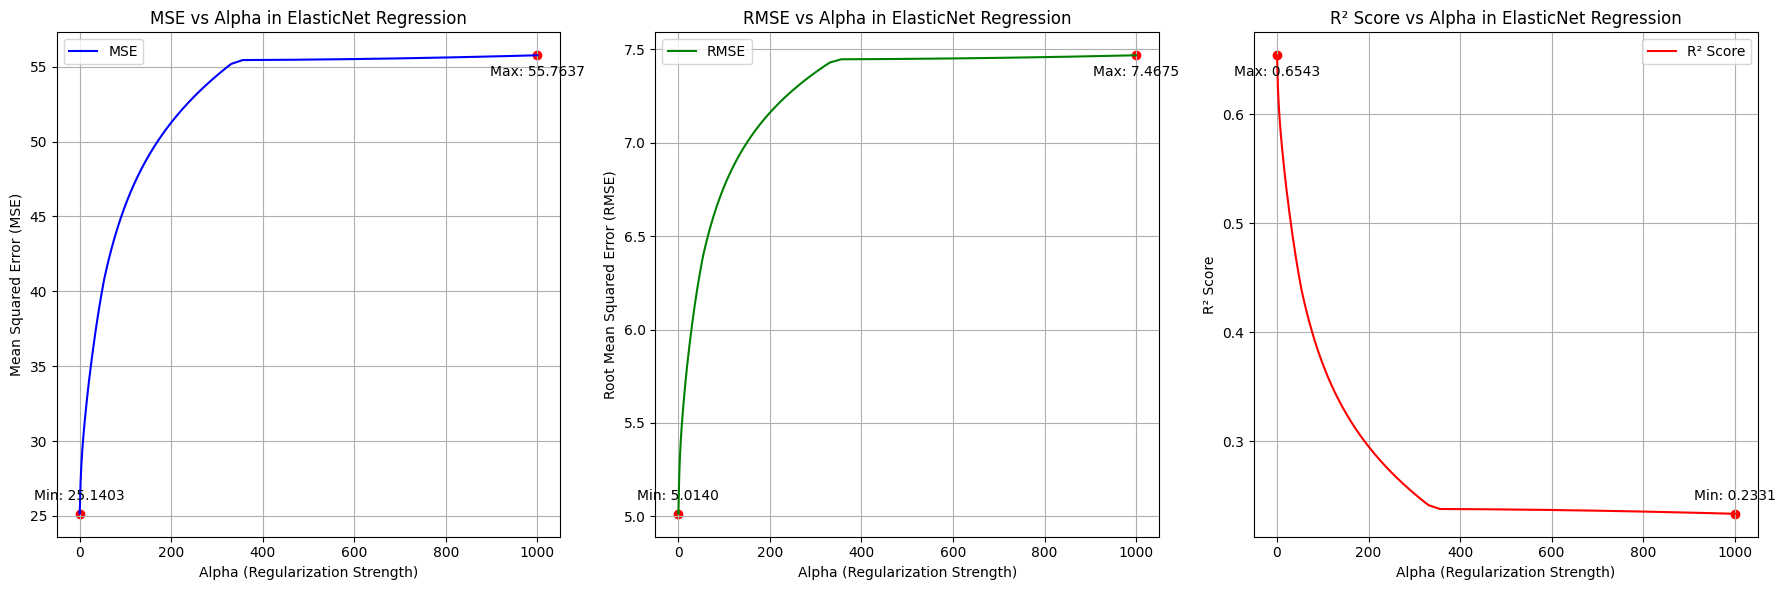

In [38]:
graph_elasticnet_performance(X_train, y_train, X_test, y_test, 1000.1, l1_ratio=0.1)

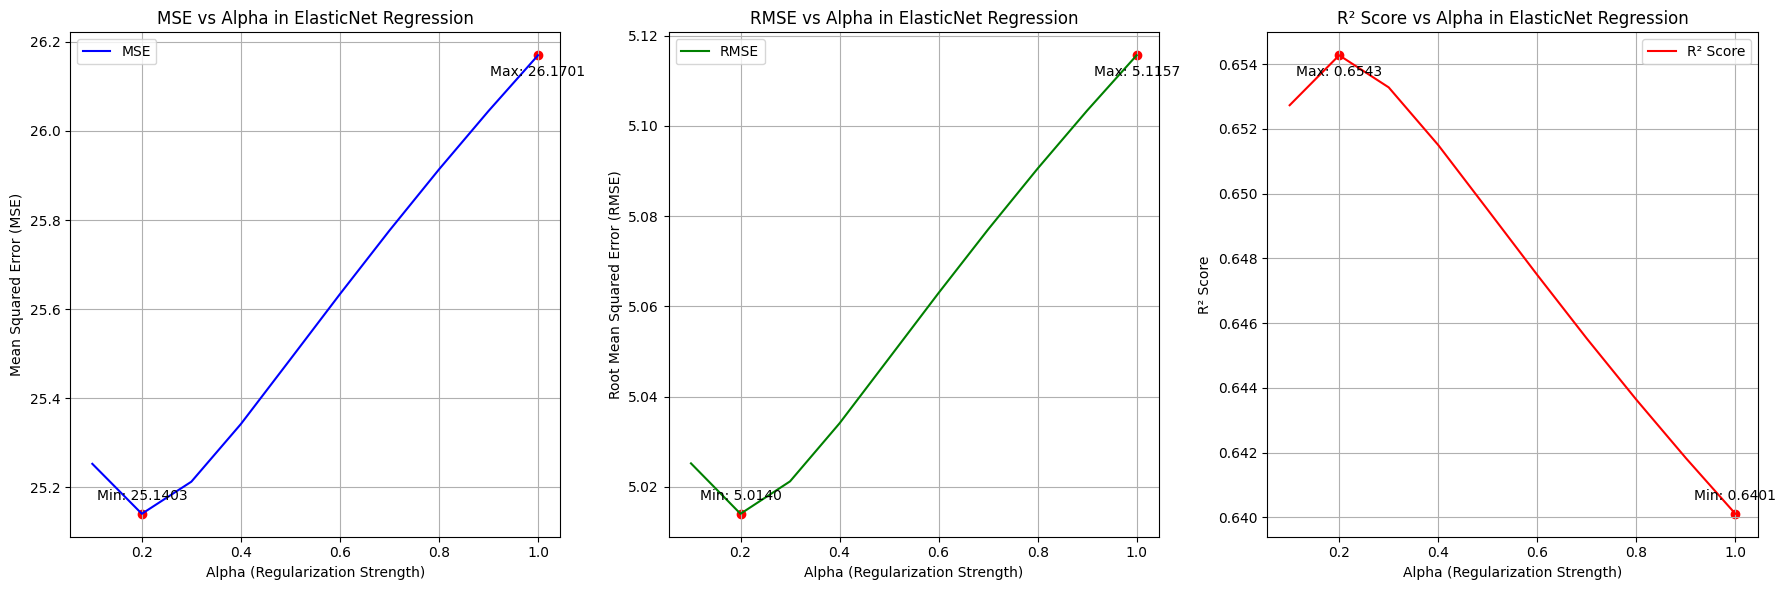

In [39]:
graph_elasticnet_performance(X_train, y_train, X_test, y_test, 1.1, l1_ratio=0.1)

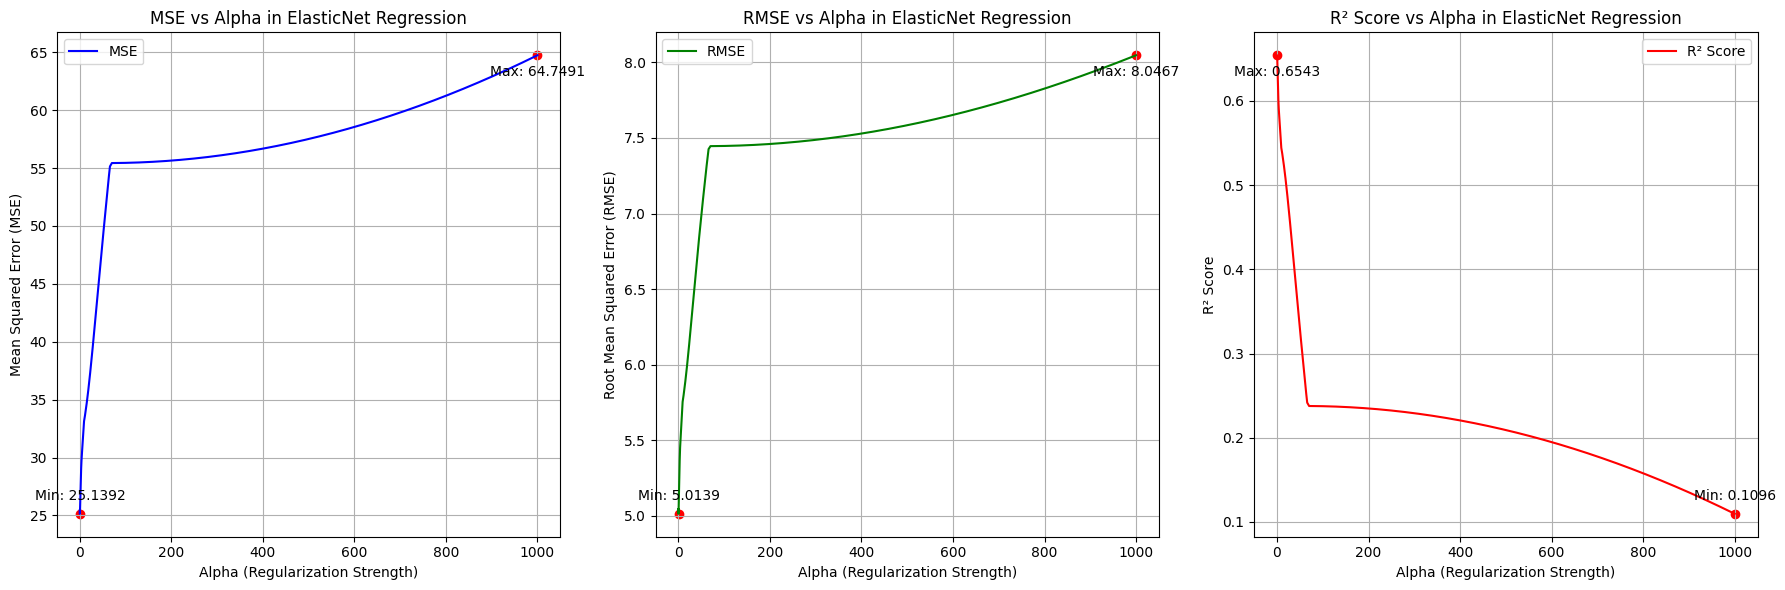

In [40]:
graph_elasticnet_performance(X_train, y_train, X_test, y_test, 1000.1, l1_ratio=0.5)

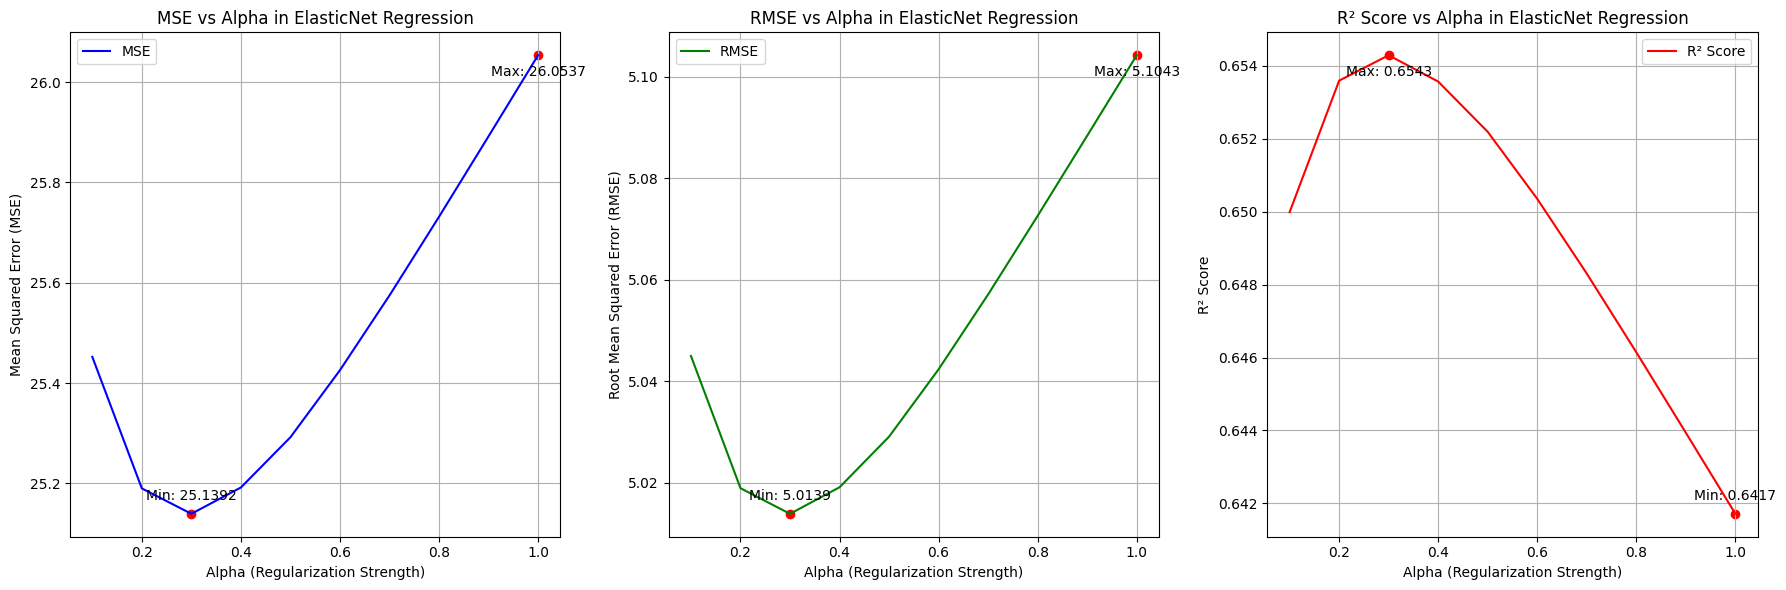

In [41]:
graph_elasticnet_performance(X_train, y_train, X_test, y_test, 1.1, l1_ratio=0.5)


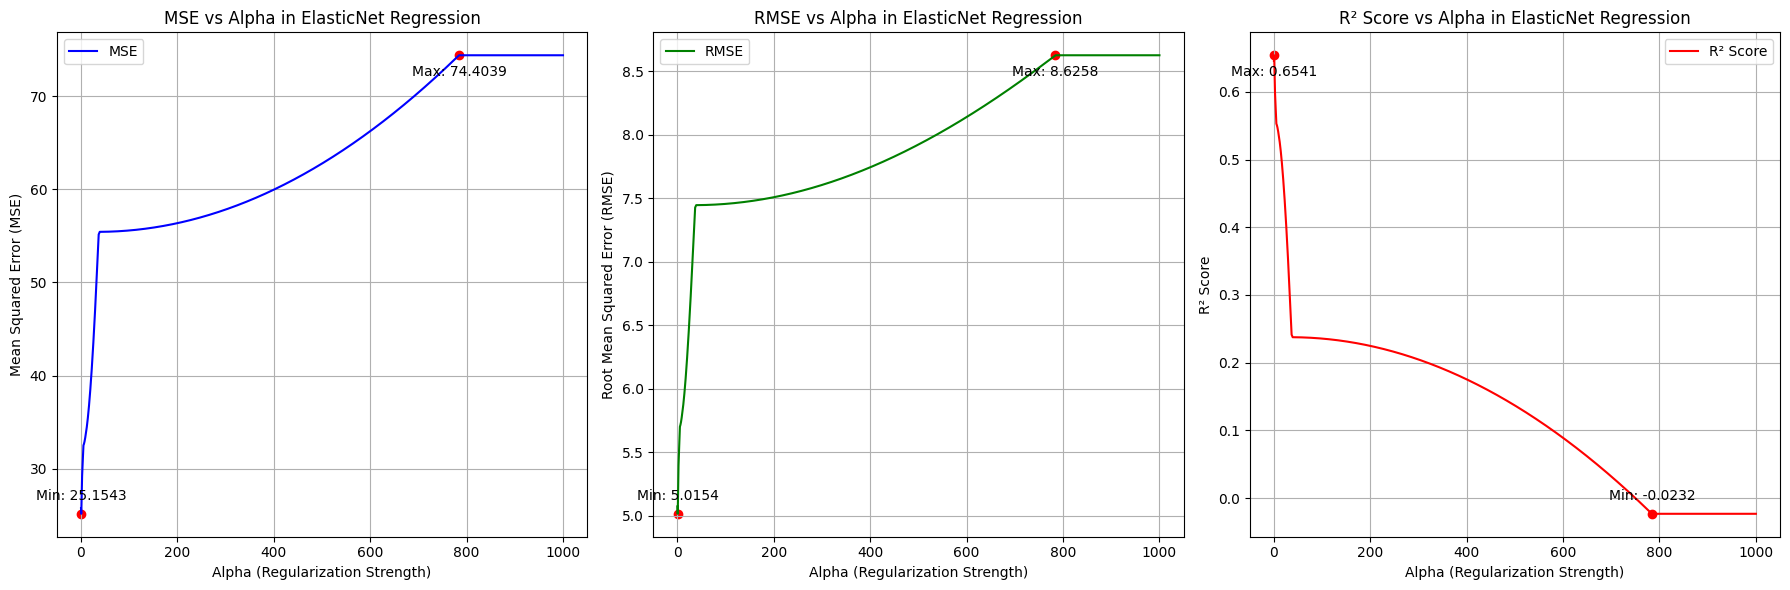

In [42]:
graph_elasticnet_performance(X_train, y_train, X_test, y_test, 1000.1, l1_ratio=0.9)

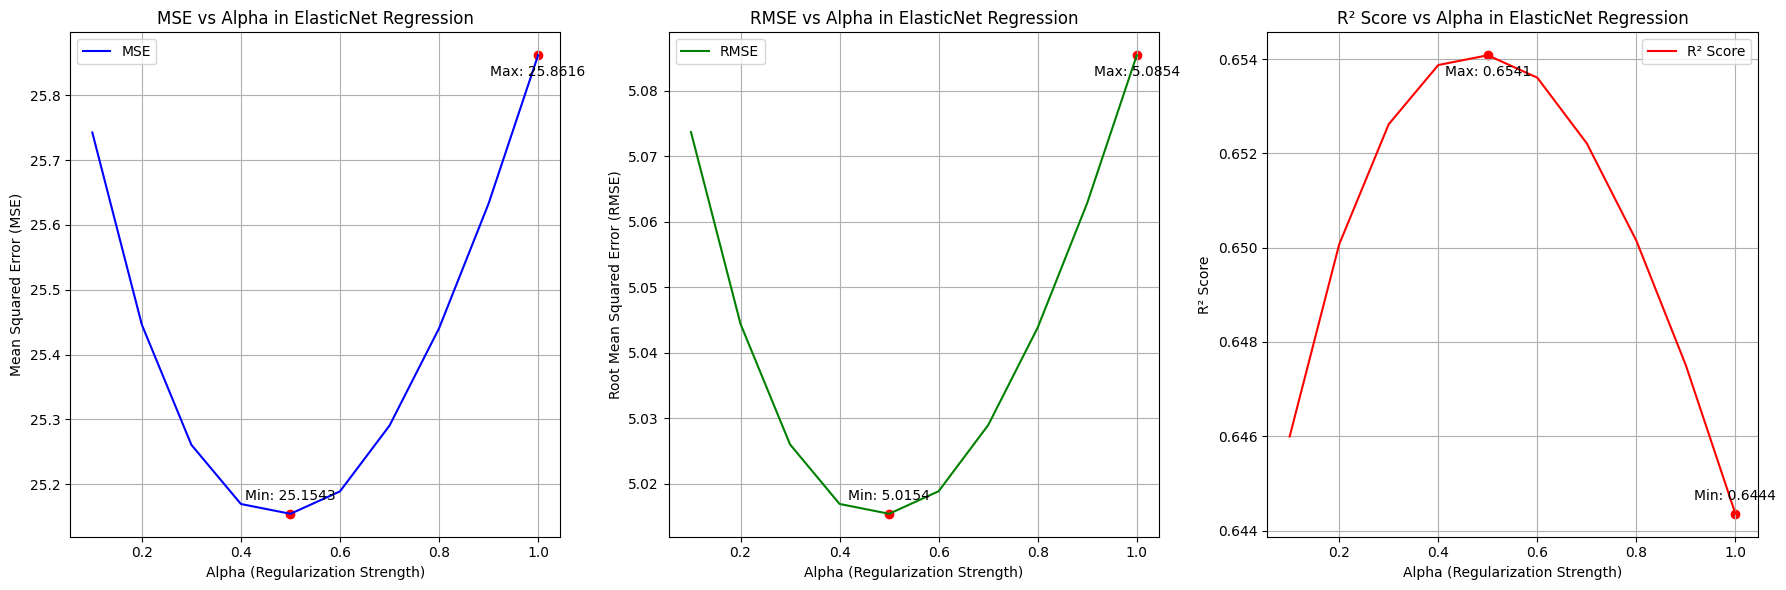

In [43]:
graph_elasticnet_performance(X_train, y_train, X_test, y_test, 1.1, l1_ratio=0.9)

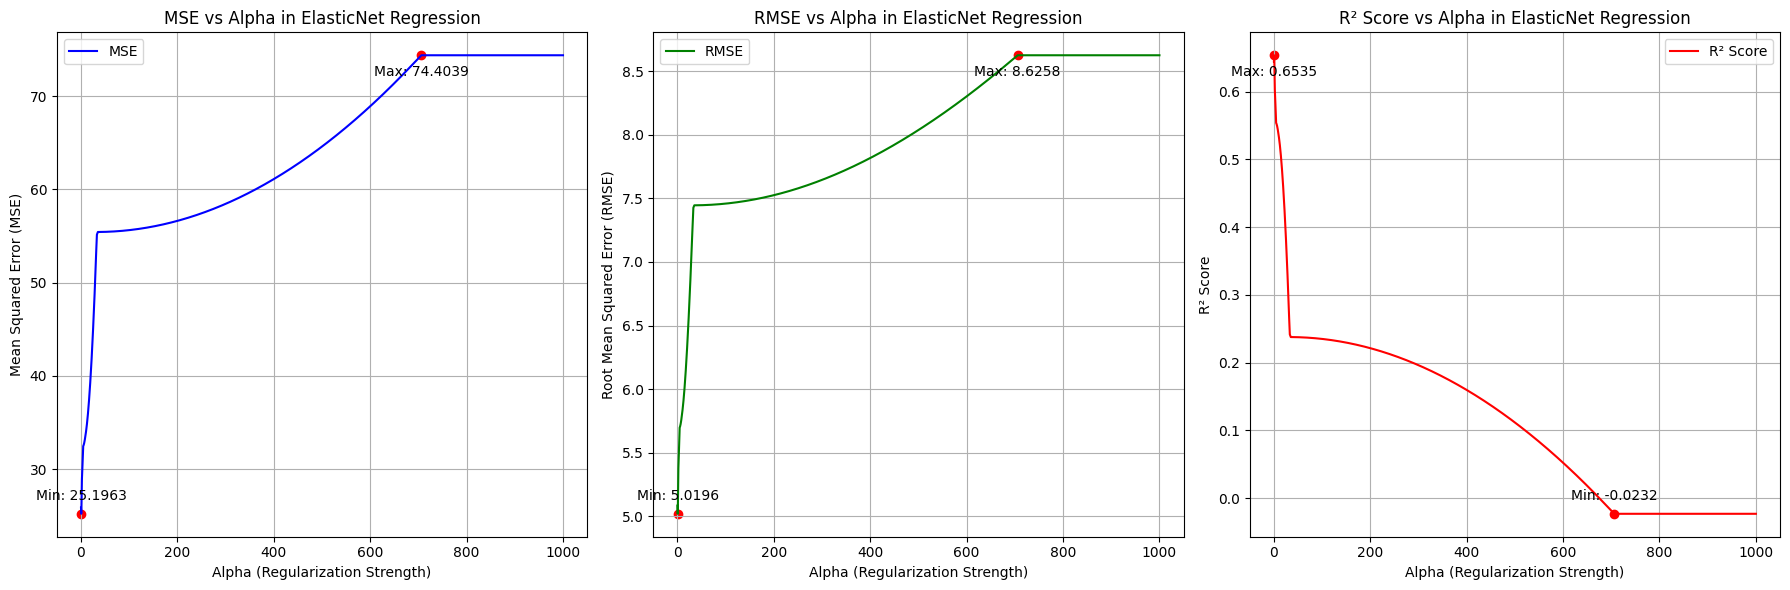

In [44]:
graph_elasticnet_performance(X_train, y_train, X_test, y_test, 1000.1, l1_ratio=1)

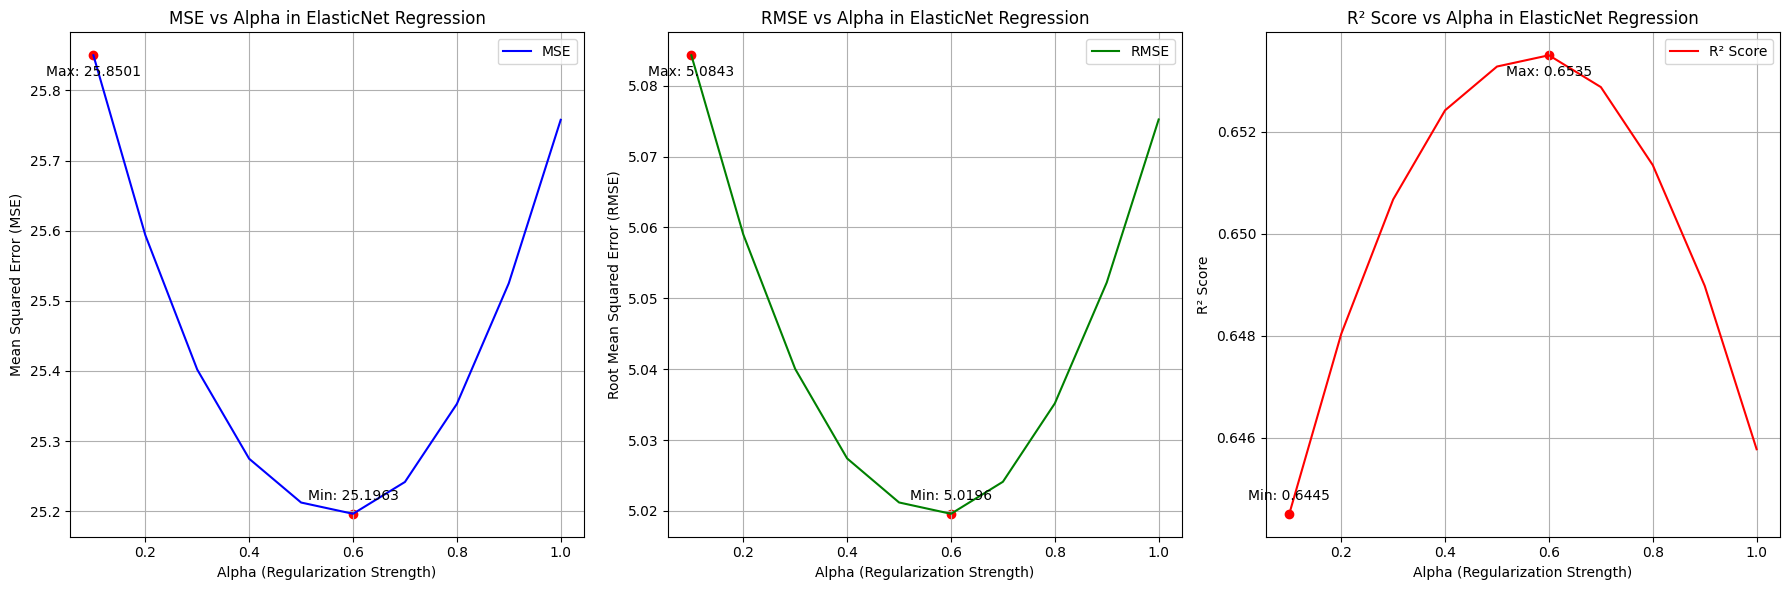

In [45]:
graph_elasticnet_performance(X_train, y_train, X_test, y_test, 1.1, l1_ratio=1)

### 5. Analysis and Interpretation

- Interpret the coefficients of the linear models to understand the impact of each 
feature on the target variable. 
- Discuss the significance of regularization in reducing overfitting. 
- Provide insights into which features are most influential in predicting housing 
prices.

In [47]:
def evaluate_model(model, X_train, y_train, X_test, y_test):
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    mse = mean_squared_error(y_test, y_pred)
    rmse = np.sqrt(mse)
    r2 = r2_score(y_test, y_pred)
    return mse, rmse, r2

# List of models
models = {
    "Linear": LinearRegression(),
    "Ridge (α=0.1)": Ridge(alpha=0.1),
    "Lasso (α=0.6)": Lasso(alpha=0.6),
    "ElasticNet (α=0.3, l1=0.1)": ElasticNet(alpha=0.3, l1_ratio=0.1),
    "ElasticNet (α=0.5, l1=0.5)": ElasticNet(alpha=0.5, l1_ratio=0.5),
    "ElasticNet (α=0.6, l1=0.9)": ElasticNet(alpha=0.6, l1_ratio=0.9),
    "ElasticNet (α=0.7, l1=1)": ElasticNet(alpha=0.7, l1_ratio=1)
}

# Evaluate models
results = []
for name, model in models.items():
    mse, rmse, r2 = evaluate_model(model, X_train, y_train, X_test, y_test)
    results.append({"Model": name, "MSE": mse, "RMSE": rmse, "R²": r2})


results_df = pd.DataFrame(results)

print("Model Evaluation Results:")
print(results_df)


Model Evaluation Results:
                        Model        MSE      RMSE        R²
0                      Linear  25.061285  5.006125  0.655361
1               Ridge (α=0.1)  25.088187  5.008811  0.654991
2               Lasso (α=0.6)  25.196304  5.019592  0.653504
3  ElasticNet (α=0.3, l1=0.1)  25.212426  5.021198  0.653282
4  ElasticNet (α=0.5, l1=0.5)  25.291913  5.029107  0.652189
5  ElasticNet (α=0.6, l1=0.9)  25.188900  5.018854  0.653606
6    ElasticNet (α=0.7, l1=1)  25.241691  5.024111  0.652880


Given that the best model and relaltive hyperparameters was ElasticNet (with α=0.3, l1=0.1), now lets apply it to all the features and check for feature importance

In [48]:
# Include all of the columns, even if it might not be necessary and introduce noise.
df = data[['MEDV', 'CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT']] 

In [49]:
# Splitting the data into training and testing sets
X = df[['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT']] # Remove MEDV as a feature
y = df['MEDV']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [50]:
# Feature scaling
scaler = StandardScaler()

# Features to scale
features_to_scale = ['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT']

X_train_scaled = X_train.copy()
X_test_scaled = X_test.copy()

X_train_scaled[features_to_scale] = scaler.fit_transform(X_train[features_to_scale])
X_test_scaled[features_to_scale] = scaler.transform(X_test[features_to_scale])

In [51]:
def train_and_evaluate_elasticnet(X_train, y_train, X_test, y_test, alpha=0.3, l1_ratio=0.1):
    # Initialize model
    model = ElasticNet(alpha=alpha, l1_ratio=l1_ratio, random_state=42)
    model.fit(X_train, y_train)

    # Make predictions
    y_pred = model.predict(X_test)

    # Compute performance metrics
    mse = mean_squared_error(y_test, y_pred)
    rmse = np.sqrt(mse)
    r2 = r2_score(y_test, y_pred)

    # Perform Permutation Importance
    result = permutation_importance(model, X_test, y_test, scoring='neg_mean_squared_error', n_repeats=10, random_state=42)

    # Extract feature importance
    feature_importances = sorted(zip(X_train.columns, result.importances_mean), key=lambda x: x[1], reverse=True)

    print("\nFeature Importances:")
    for feature, importance in feature_importances:
        print(f"Feature: {feature}, Importance: {importance:.4f}")

    return model, feature_importances

In [52]:
best_model, feature_importances = train_and_evaluate_elasticnet(X_train, y_train, X_test, y_test)


Feature Importances:
Feature: LSTAT, Importance: 41.3119
Feature: RAD, Importance: 19.8623
Feature: TAX, Importance: 13.7328
Feature: DIS, Importance: 9.3868
Feature: PTRATIO, Importance: 5.9274
Feature: RM, Importance: 3.9451
Feature: ZN, Importance: 3.7959
Feature: INDUS, Importance: 0.3405
Feature: CRIM, Importance: 0.2487
Feature: CHAS, Importance: 0.0494
Feature: NOX, Importance: 0.0074
Feature: AGE, Importance: -0.0009
Feature: B, Importance: -0.0201


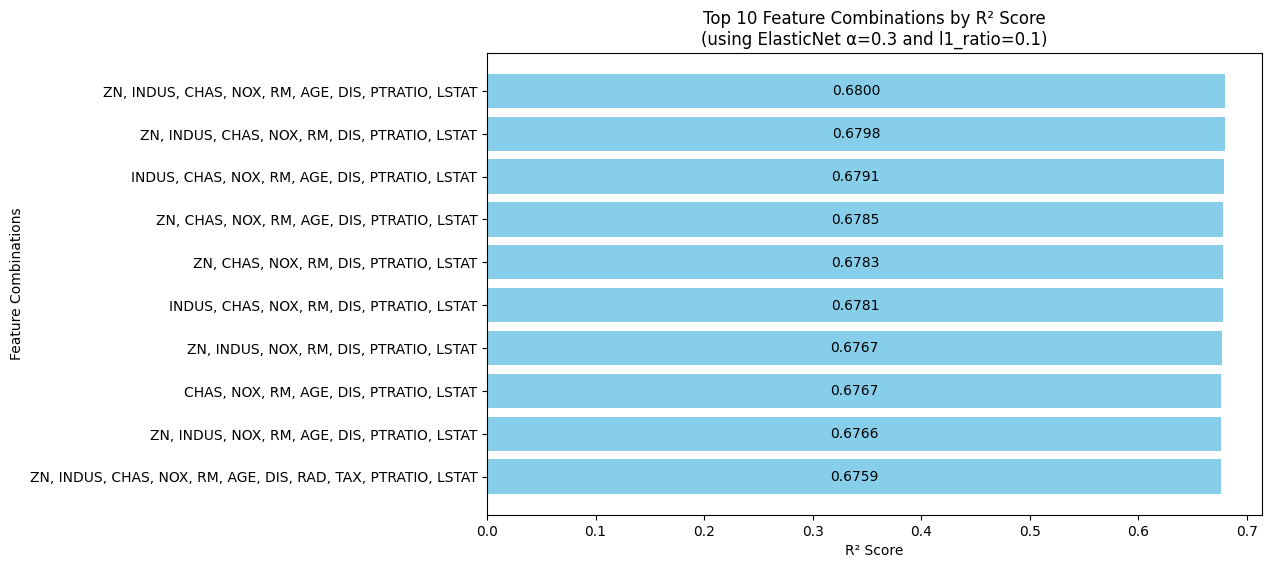

Best subset of features: ['ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'PTRATIO', 'LSTAT']
Best R² score: 0.6800


In [53]:
import itertools

# Function to train and evaluate the model
def train_and_evaluate_elasticnet(X_train, y_train, X_test, y_test, alpha=0.3, l1_ratio=0.1):
    model = ElasticNet(alpha=alpha, l1_ratio=l1_ratio, random_state=42)
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    r2 = r2_score(y_test, y_pred)
    return r2  # Return R² score as the metric for evaluation

# Brute-force feature selection with plotting
def brute_force_feature_selection(X, y, max_features=None, top_n=10):
    features = X.columns.tolist()
    results = []  # To store (subset, score) pairs

    # If max_features is not specified, consider all possible subsets
    if max_features is None:
        max_features = len(features)

    # Iterate over all possible combinations of features
    for k in range(1, max_features + 1):
        for subset in itertools.combinations(features, k):
            subset = list(subset)
            X_subset = X[subset]

            # Split the data
            X_train, X_test, y_train, y_test = train_test_split(X_subset, y, test_size=0.2, random_state=42)

            # Scale the features
            scaler = StandardScaler()
            X_train_scaled = scaler.fit_transform(X_train)
            X_test_scaled = scaler.transform(X_test)

            # Train and evaluate the model
            score = train_and_evaluate_elasticnet(X_train_scaled, y_train, X_test_scaled, y_test)

            # Store the result
            results.append((subset, score))

    # Sort results by score in descending order
    results.sort(key=lambda x: x[1], reverse=True)

    # Select the top N results
    top_results = results[:top_n]

    # Plot the top N feature combinations
    plot_top_combinations(top_results)

    # Return the best subset and score
    return top_results[0][0], top_results[0][1]

# Function to plot the top N feature combinations
def plot_top_combinations(top_results):
    # Extract feature combinations and scores
    combinations = [", ".join(result[0]) for result in top_results]
    scores = [result[1] for result in top_results]

    # Create a bar plot
    plt.figure(figsize=(10, 6))
    bars = plt.barh(combinations, scores, color='skyblue')
    plt.xlabel('R² Score')
    plt.ylabel('Feature Combinations')
    plt.title('Top 10 Feature Combinations by R² Score\n(using ElasticNet α=0.3 and l1_ratio=0.1)')
    plt.gca().invert_yaxis() 
    for bar, score in zip(bars, scores):
        plt.text(
            bar.get_width() / 2,  
            bar.get_y() + bar.get_height() / 2,
            f"{score:.4f}",  
            va='center', ha='center', fontsize=10, color='black'
        )
    plt.show()

# Run the brute-force feature selection
best_subset, best_score = brute_force_feature_selection(X, y)

print(f"Best subset of features: {best_subset}")
print(f"Best R² score: {best_score:.4f}")

In [57]:
def evaluate_model(model, X_train, y_train, X_test, y_test):
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    mse = mean_squared_error(y_test, y_pred)
    rmse = np.sqrt(mse)
    r2 = r2_score(y_test, y_pred)
    return mse, rmse, r2

# List of models
models = {
    "Linear": LinearRegression(),
    "Ridge (α=0.1)": Ridge(alpha=0.1),
    "Lasso (α=0.6)": Lasso(alpha=0.6),
    "ElasticNet (α=0.3, l1=0.1)": ElasticNet(alpha=0.3, l1_ratio=0.1),
    "ElasticNet (α=0.5, l1=0.5)": ElasticNet(alpha=0.5, l1_ratio=0.5),
    "ElasticNet (α=0.6, l1=0.9)": ElasticNet(alpha=0.6, l1_ratio=0.9),
    "ElasticNet (α=0.7, l1=1)": ElasticNet(alpha=0.7, l1_ratio=1)
}

# Evaluate models
results = []
for name, model in models.items():
    mse, rmse, r2 = evaluate_model(model, X_train, y_train, X_test, y_test)
    results.append({"Model": name, "MSE": mse, "RMSE": rmse, "R²": r2})


results_df = pd.DataFrame(results)

print("Model Evaluation Results:")
print(results_df)


Model Evaluation Results:
                        Model        MSE      RMSE        R²
0                      Linear  23.344792  4.831645  0.678966
1               Ridge (α=0.1)  23.366174  4.833857  0.678672
2               Lasso (α=0.6)  23.582909  4.856224  0.675691
3  ElasticNet (α=0.3, l1=0.1)  22.992627  4.795063  0.683809
4  ElasticNet (α=0.5, l1=0.5)  23.145197  4.810946  0.681711
5  ElasticNet (α=0.6, l1=0.9)  23.387739  4.836087  0.678375
6    ElasticNet (α=0.7, l1=1)  23.567945  4.854683  0.675897


### 6. Documentation: 
- Submit a comprehensive report detailing your methodology, experiments, results, 
and conclusions. 
- The report should be in a 2-column format (IEEE or ACM) and include sections 
such as Introduction, Methodology, Experiments, Results, and Conclusions

Please refer to the IEEE formatted paper. Thank you :)